<a href="https://colab.research.google.com/github/zpsy-hub/Data-Mining-Principles/blob/main/Data_Mining%20-%20Milestone%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Reading Data**

Load the necessary tools and functions that will be used throughout the analysis.

In [ ]:
import pandas as pd  # For data manipulation and analysis (e.g., DataFrames).
import numpy as np  # For numerical operations and handling arrays.
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations.
import seaborn as sns  # For statistical data visualization (based on matplotlib).
import scipy.stats as stats  # For statistical functions like hypothesis tests and distributions.
import plotly.express as px  # For interactive plots and dashboards.
from scipy.stats import skew, kurtosis  # For calculating skewness and kurtosis of distributions.
from sklearn.linear_model import LinearRegression  # For performing linear regression analysis.
from IPython.display import display  # For displaying DataFrames in a more readable format in Jupyter/Colab.

Load the dataset into memory so we can work with it and start analyzing the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Show all columns
pd.set_option('display.max_columns', None)

# Load the datasets
df_customer_feedback = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/raw data/Customer_Feedback_Data.csv')
df_product_offering = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/raw data/Product_Offering_Data.csv')
df_transaction = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/raw data/Transaction_Data.csv')


# **Data Overview**

Understanding the initial structure and quality of the data helps identify potential issues (like missing values or inconsistencies) before starting the cleaning process.

Load the 3 datasets into a dictionary, allowing us to loop through them in the next steps.

In [ ]:
# Dictionary of DataFrames
dfs = {
    'Customer Feedback Data': df_customer_feedback,
    'Product Offering Data': df_product_offering,
    'Transaction Data': df_transaction
}

### **Summary Statistics**

`describe()` provides a summary of the data, showing key statistics like mean, standard deviation, min, and max values for numerical columns.

It helps quickly understand the distribution and general characteristics of the data, which is useful for identifying any potential outliers or issues before cleaning.

In [ ]:
for name, df in dfs.items():
    print(f"{name}:\n{df.describe()}\n")

Customer Feedback Data:
       Customer_ID  Satisfaction_Score  Likelihood_to_Recommend
count  5050.000000         4949.000000              5050.000000
mean    501.949703            5.684785                 5.571287
std     288.806331            3.606511                 2.872577
min       1.000000            1.000000                 1.000000
25%     253.000000            3.000000                 3.000000
50%     502.000000            6.000000                 6.000000
75%     751.750000            8.000000                 8.000000
max    1000.000000           60.000000                10.000000

Product Offering Data:
       Product_ID  Target_Age_Group
count   15.000000               0.0
mean     5.133333               NaN
std      3.159265               NaN
min      1.000000               NaN
25%      2.500000               NaN
50%      5.000000               NaN
75%      7.500000               NaN
max     10.000000               NaN

Transaction Data:
       Transaction_ID  Customer_I

 ### **Display Index, Columns, and Data**

`info()` provides an overview of the dataset, including the number of entries, column names, data types, and memory usage.

 It gives a quick check on the structure of the data, helping identify missing values and understanding the types of data you're working with before proceeding with analysis or cleaning.

In [ ]:
for name, df in dfs.items():
    print(f"\n=== {name} ===")
    print("DataFrame Info:\n")
    df.info()




=== Customer Feedback Data ===
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB

=== Product Offering Data ===
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Ta

In [ ]:
for name, df in dfs.items():
    print(f"{name}:")
    display(df.head(10))


Customer Feedback Data:


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7
5,6,3.0,Needs improvement,1
6,7,3.0,Needs improvement,2
7,8,7.0,Needs improvement,5
8,9,10.0,Good service,9
9,10,7.0,Good service,1


Product Offering Data:


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium
5,6,Personal Loan,Loan,Medium,NaN,Low
6,7,Youth Savings Account,Savings Account,Low,NaN,Low
7,8,Retirement Investment Fund,Investment,High,NaN,High
8,9,Business Loan,Loan,Medium,NaN,Medium
9,10,Travel Credit Card,Credit Card,Medium,NaN,Medium


Transaction Data:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment
5,6,348,2023-01-01 05:00:00,3824.0,Loan Payment
6,7,50,2023-01-01 06:00:00,235.0,Loan Payment
7,8,916,2023-01-01 07:00:00,1052.0,Loan Payment
8,9,105,2023-01-01 08:00:00,854.0,Purchase
9,10,420,2023-01-01 09:00:00,2690.0,Investment


##**Observations after Cursory look at the data**



####**Customer Feedback Data**
This dataset seems to be about collecting feedback from customers about their experiences with a product or service.

|Column Name|Description|Data Type|Sample Data|
|:---|:---|:---|:---|
|Customer_ID|A unique identifier for each customer|int|1, 2, 3|
|Satisfaction_Score|A numerical score indicating how satisfied the customer is|float|10.0, 3.0, 7.0|
|Feedback_Comments|A categorical field with short comments about the service|object|Very satisfied, Needs improvement|
|Likelihood_to_Recommend|A numerical score showing how likely the customer is to recommend the product/service|int|9, 3, 1|

Based on the df.describe():
*   `Customer_ID`: Ranges from 1-1000, but total count is 5050 so there are repeat customers that gave multiple feedback.
*   `Satisfaction_Score`: Max is 60, but mean is 5.68 and 75th prinicple is 8.00, 60 seems like an outlier.
*   `Likelihood_to_Recommend`: Range is 1 to 10, seems to be a scale.

Recommendations:


*   Change `Satisfaction_Score` to int.
*   `Feedback_Comments`, check if it can be categorical, seems like the same comments repeat. There are only 5 comments throughout the column,Very satisfied, Good service, Needs improvement, Unsatisfactory and Excellent . Is there correlation with `Satisfaction_Score` and/or `Likelihood_to_Recommend`?
*   Both `Satisfaction_Score` and `Likelihood_to_Recommend` seem like they are scaled from 1 to 10. Since there are only 5 unique feedback comments, investigate this further to understand the patterns or trends in feedback.

####**Product Offering Data**
This dataset seems to be a catalog or list of products/services offered by a company.

|Column Name|Description|Data Type|Sample Data|
|:---|:---|:---|:---|
|Product_ID|A unique identifier for each product|int|1, 2, 3|
|Product_Name|The name of the product|object|Platinum Credit Card, Gold Savings Account|
|Product_Type|A broader category of the product (e.g., Credit Card, Loan)|object|Credit Card, Savings Account|
|Risk_Level|The risk level associated with the product|object|Medium, Low, High|
|Target_Age_Group|This column is empty, so its purpose is unclear without more context|float|||
|Target_Income_Group|The income level the product is designed for|object|Medium, Low, High|

Based on the df.describe():
*   `Product_ID`: Ranges from 1-10, but total count is 15 so there are either duplicates or multiple products with the same Product_ID.
*   `Target_Age_Group`: Whole column is missing data. Drop this column?
*   `Risk_Level` and `Target_Income_Group`: Both are scales. They can be processed using ordinal encoding (is this needed? hm..).

####**Transaction Data**
This dataset seems to be recorded transactions made by customers.

|Column Name|Description|Data Type|Sample Data|
|:---|:---|:---|:---|
|Transaction_ID|A unique identifier for each transaction|int|1, 2, 3|
|Customer_ID|The identifier of the customer who made the transaction|int|393, 826, 916|
|Transaction_Date|The date and time of the transaction|object|2023-01-01 00:00:00, 2023-01-01 01:00:00|
|Transaction_Amount|The amount of money involved in the transaction|float|3472.0, 10.0, 72.0|
|Transaction_Type|The type of transaction (e.g., Purchase, Bill Payment)|object|Purchase, Bill Payment, Investment|

Recommendations:
*   `Transaction_Date`: Change data type to datetime.
*   `Customer_ID`: Can be cross referenced with `Customer_ID` from Customer Feedback Data.

# **Data Cleaning**
Cleaning data is crucial to remove errors, inconsistencies, and missing values. It ensures accurate analysis, improves model performance, and helps create meaningful visualizations, leading to reliable insights.

Created copies of the original DataFrames and stored them in a new dictionary to avoid modifying the original data during the cleaning process.

In [ ]:
# Copies of original data set
feedback = df_customer_feedback.copy()
products = df_product_offering.copy()
transactions = df_transaction.copy()

# Copy original datasets into a dictionary
df_copy = {
    'feedback': df_customer_feedback.copy(),
    'products': df_product_offering.copy(),
    'transactions': df_transaction.copy()
}

### **Removing Duplicates**

Removing duplicates ensures data accuracy by eliminating redundant entries, preventing skewed analysis and misleading patterns. It prevents redundant data from affecting later cleaning steps like handling missing values or detecting outliers. Ensures a clean, unique dataset from the start.

In [ ]:
# Check, remove duplicates, and validate
for name, df in df_copy.items():
    before = df.duplicated().sum()
    print("--------------------------------------------------")
    print(f"Number of duplicate rows in {name} before removal: {before}")

    df.drop_duplicates(inplace=True)

    after = df.duplicated().sum()
    print(f"Number of duplicate rows in {name} after removal: {after}")

    assert after == 0, f"Duplicates still exist in {name}."

# Unpack cleaned DataFrames
feedback, products, transactions = df_copy.values()

--------------------------------------------------
Number of duplicate rows in feedback before removal: 81
Number of duplicate rows in feedback after removal: 0
--------------------------------------------------
Number of duplicate rows in products before removal: 5
Number of duplicate rows in products after removal: 0
--------------------------------------------------
Number of duplicate rows in transactions before removal: 50
Number of duplicate rows in transactions after removal: 0


### **Removing outliers for 'Satisfaction_Score'**

The next step is filling missing values, but a quick look at the data shows that Satisfaction_Score may have outliers (e.g., max is 60, while the 75th percentile is 8.00). Before filling in missing data, it's important to check for and remove outliers to prevent them from distorting the dataset.

In [ ]:
# Count the occurrences of each unique value in 'Satisfaction_Score'
satisfaction_counts = feedback['Satisfaction_Score'].value_counts()

# Print the results
print(satisfaction_counts)

Satisfaction_Score
7.0     532
5.0     523
10.0    505
6.0     497
8.0     485
4.0     485
9.0     469
3.0     469
2.0     454
1.0     440
60.0      2
51.0      2
58.0      2
52.0      1
56.0      1
53.0      1
54.0      1
Name: count, dtype: int64


Since there are only 10 outliers, it is better to drop these data, than replace as it could skew the results if kept.

In [ ]:
# Check IQR for the outliers

# Calculate Q1, Q3, and IQR for 'Satisfaction_Score'
Q1 = feedback['Satisfaction_Score'].quantile(0.25)
Q3 = feedback['Satisfaction_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = feedback[(feedback['Satisfaction_Score'] < lower_bound) | (feedback['Satisfaction_Score'] > upper_bound)]

# Print or further process the outliers
print("Outliers in 'Satisfaction_Score':")
outliers

Outliers in 'Satisfaction_Score':


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
529,530,52.0,Good service,10
573,574,60.0,Good service,9
857,858,56.0,Very satisfied,10
1090,218,60.0,Good service,1
2451,582,51.0,Good service,5
3012,926,58.0,Good service,9
3306,503,51.0,Excellent,8
4131,949,53.0,Unsatisfactory,7
4499,934,58.0,Good service,4
4650,615,54.0,Unsatisfactory,7


To confirm these are true outliers, used the Interquartile Range (IQR) method.

IQR measures the spread of the middle 50% of the data:


*   Q1 (25th percentile): The lower boundary of the middle 50%.
*   Q3 (75th percentile): The upper boundary of the middle 50%.
*   IQR = Q3 - Q1, representing data variability.

Outliers are values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

This method confirms that the 10 data points exceed the upper bound, making them true outliers. Removing them prevents skewed results.

In [ ]:
# Identify outliers (scores above 10)
outlier_mask = feedback['Satisfaction_Score'] > 10

# Remove outlier rows
feedback = feedback[~outlier_mask]

# Verify that outliers are removed
print(feedback['Satisfaction_Score'].value_counts())

Satisfaction_Score
7.0     532
5.0     523
10.0    505
6.0     497
8.0     485
4.0     485
3.0     469
9.0     469
2.0     454
1.0     440
Name: count, dtype: int64


As can be seen, the satisfaction score now ranges from 1 to 10. Since this is a scale, it is necessary to remove and check for any outliers.

### **Customer Feedback Data Filling Missing Values**

In [ ]:
# Count missing values for each column
missing_values = feedback.isnull().sum()

# Print the results
print(missing_values)

Customer_ID                  0
Satisfaction_Score         100
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


100 of 5050 is missing. Only 2% of data is missing.

Use median to fill in missing data. The median is preferred over the mean because it is:
* Robust to outliers:  Not significantly affected by extreme values.
* Consistent with data: Ensures a whole-number result, matching existing scores.

In [ ]:
# Calculate the median Satisfaction_Score
median_satisfaction = feedback['Satisfaction_Score'].median()

# Fill missing values using .loc
feedback.loc[feedback['Satisfaction_Score'].isnull(), 'Satisfaction_Score'] = median_satisfaction

# Verify that there are no more missing values
print(feedback['Satisfaction_Score'].isnull().sum())

0


### **Product data Filling Missing Values**
Dropped the 'Target_Age_Group' column because it is empty. Since the column contains no useful data, removing it ensures that it doesn’t interfere with the analysis or introduce unnecessary noise into the dataset.

In [ ]:
# Count missing values for each column
missing_values = products.isnull().sum()

# Print the results
print(missing_values)

Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       10
Target_Income_Group     0
dtype: int64


In [ ]:
# Drop the 'Target_Age_Group' column
products = products.drop('Target_Age_Group', axis=1)

### **Transaction data Filling Missing Values**

The approach to imputing missing values in the "Transaction_Amount" column is to use the mean value for each Transaction_Type. Instead of filling all missing values with an overall mean, the mean for each transaction type is used to better reflect the data's structure. This ensures that the imputed values are more accurate and aligned with the respective transaction types. After this imputation, the data no longer has missing values, making it ready for analysis.

In [ ]:
# Count missing values for each column
missing_values = transactions.isnull().sum()

# Print the results
print(missing_values)

Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


In [ ]:
# Calculate the mean Transaction_Amount for each Transaction_Type
mean_by_type = transactions.groupby('Transaction_Type')['Transaction_Amount'].mean()

# Fill missing values in 'Transaction_Amount' using the calculated means
transactions['Transaction_Amount'] = transactions.apply(
    lambda row: mean_by_type[row['Transaction_Type']] if pd.isnull(row['Transaction_Amount']) else row['Transaction_Amount'],
    axis=1
)

# Verify that there are no more missing values
print(transactions['Transaction_Amount'].isnull().sum())

0


In [ ]:
# Recheck all 3 data set for missing values return count of missing
feedback.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Transaction_Amount,0
Transaction_Type,0


### **Changing Data Types**
Changing data types in data cleaning is important because it saves memory, prevents errors, ensures compatibility with analysis tools, and makes the data uniform, simplifying analysis.

In [ ]:
for name, df in dfs.items():
    print(f"Data types for {name}:")
    print(df.dtypes)
    print()


Data types for Customer Feedback Data:
Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

Data types for Product Offering Data:
Product_ID               int64
Product_Name            object
Product_Type            object
Risk_Level              object
Target_Age_Group       float64
Target_Income_Group     object
dtype: object

Data types for Transaction Data:
Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object



In [ ]:
# Change Data types for Customer_Feedback Data

# Convert 'Satisfaction_Score' to int
feedback['Satisfaction_Score'] = feedback['Satisfaction_Score'].astype(int) # Use column name directly

# Check data types
feedback.dtypes

<ipython-input-21-ef61c2dbcfde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback['Satisfaction_Score'] = feedback['Satisfaction_Score'].astype(int) # Use column name directly


,0
Customer_ID,int64
Satisfaction_Score,int64
Feedback_Comments,object
Likelihood_to_Recommend,int64


*   Changed Satisfaction_Score from object to integer to allow proper numerical
analysis.
*   Changed Feedback_Comments to category to optimize storage and prepare for one-hot encoding (if applicable).


In [ ]:
# Change Data types for Product Offering Data:

# Convert 'Product_Type' to category
products['Product_Type'] = products['Product_Type'].astype('category')

# Convert 'Risk_Level' to category
products['Risk_Level'] = products['Risk_Level'].astype('category')

# Convert 'Target_Income_Group' to category
products['Target_Income_Group'] = products['Target_Income_Group'].astype('category')

# Check data types
products.dtypes

,0
Product_ID,int64
Product_Name,object
Product_Type,category
Risk_Level,category
Target_Income_Group,category


Changed Product_Type, Risk_Level, and Target_Income_Group from object to category.

In [ ]:
# Change Data types for Transaction Data

# Convert 'Transaction_Date' to datetime
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])

# Convert 'Transaction_Type' to category
transactions['Transaction_Type'] = transactions['Transaction_Type'].astype('category')

# Check data types
transactions.dtypes

,0
Transaction_ID,int64
Customer_ID,int64
Transaction_Date,datetime64[ns]
Transaction_Amount,float64
Transaction_Type,category


*   Changed Transaction_Date from object to datetime
*   Converted Transaction_Type to category to optimize storage and prepare for one-hot encoding



In [ ]:
# New df dictionary dfs_cleaned, containing the cleaned data sets

dfs_cleaned = {
    'Customer Feedback Data': feedback,
    'Product Offering Data': products,
    'Transaction Data': transactions
}

## **Checking for Outliers**

After removing duplicates and filling in missing data, the next step is checking for outliers.

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Print or return outliers
    if not outliers.empty:
        print(f"Outliers detected in {column_name}:")
        print(outliers[[column_name]])
    else:
        print(f"No outliers detected in {column_name}")

# Loop through each DataFrame and its numerical columns in dfs_cleaned
for name, df in dfs_cleaned.items():
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        detect_outliers_iqr(df, col)


No outliers detected in Customer_ID
No outliers detected in Satisfaction_Score
No outliers detected in Likelihood_to_Recommend
No outliers detected in Product_ID
No outliers detected in Transaction_ID
No outliers detected in Customer_ID
Outliers detected in Transaction_Amount:
      Transaction_Amount
612             480300.0
1264            390200.0
1738            194500.0
2045            183500.0
2184             94500.0
2270            428900.0
3037            458600.0
3059            270900.0
3289            175600.0
4852            362700.0


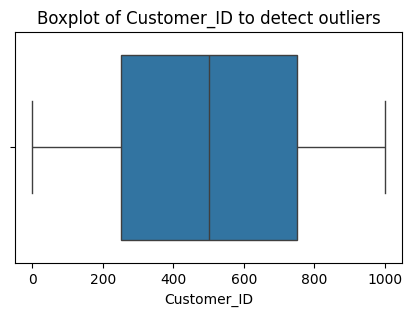

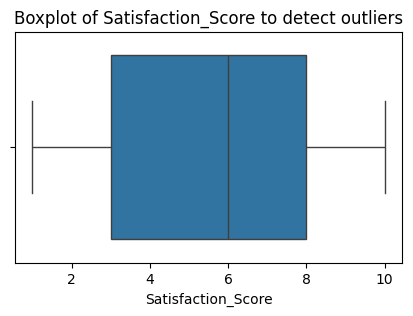

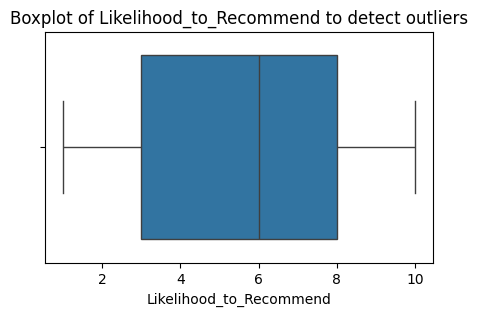

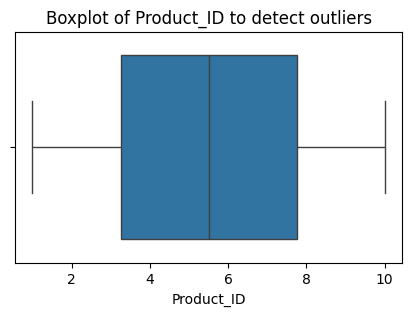

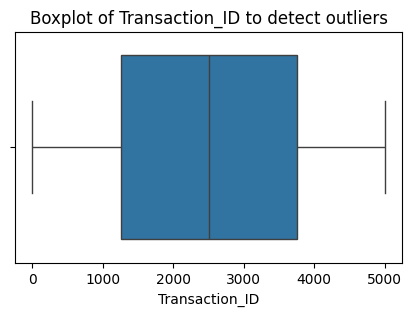

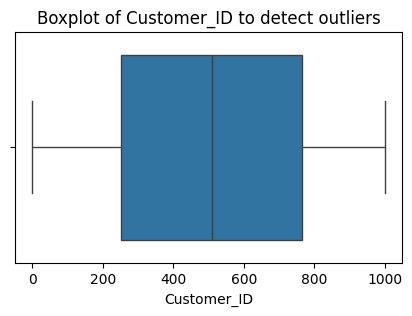

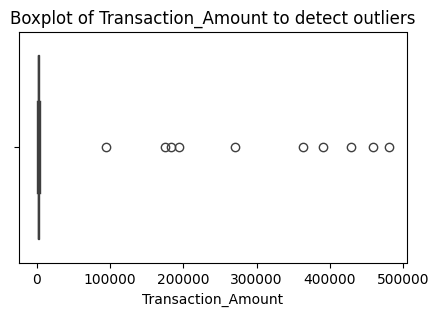

In [ ]:
# Check for outliers using boxplot for all data sets

# Function to detect and visualize outliers using boxplots
def detect_outliers_boxplot(df, column_name):
    # Check if the column has any non-NaN values before creating the boxplot
    if df[column_name].notna().any():
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[column_name])
        plt.title(f'Boxplot of {column_name} to detect outliers')
        plt.show()
    else:
        print(f"Skipping boxplot for '{column_name}' as it contains only NaN values.")

# Loop through each DataFrame and its numerical columns in dfs_cleaned
for name, df in dfs_cleaned.items():  # Changed to dfs_cleaned
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        detect_outliers_boxplot(df, col)

Boxplots are used to visually check for outliers by displaying the distribution of data, highlighting values outside the typical range.

Among all data, only the Transaction_Amount boxplot data shows extreme values outside the whiskers, indicating outliers. These may represent unusually high transactions and need further investigation or removal.

In [ ]:
top_20_transactions = dfs_cleaned['Transaction Data'].nlargest(20, 'Transaction_Amount')
display(top_20_transactions)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
612,613,191,2023-01-26 12:00:00,480300.0,Bill Payment
3037,3038,690,2023-05-07 13:00:00,458600.0,Bill Payment
2270,2271,521,2023-04-05 14:00:00,428900.0,Investment
1264,1265,772,2023-02-22 16:00:00,390200.0,Bill Payment
4852,4853,396,2023-07-22 04:00:00,362700.0,Loan Payment
3059,3060,195,2023-05-08 11:00:00,270900.0,Investment
1738,1739,27,2023-03-14 10:00:00,194500.0,Bill Payment
2045,2046,59,2023-03-27 05:00:00,183500.0,Loan Payment
3289,3290,649,2023-05-18 01:00:00,175600.0,Purchase
2184,2185,850,2023-04-02 00:00:00,94500.0,Loan Payment


The next step involved sorting the data by Transaction_Amount to identify the extreme values. The top 20 transactions displayed here match the number of extreme values seen in the boxplot.

In [ ]:
# Calculate Q1, Q3, and IQR for 'Transaction_Amount'
Q1 = transactions['Transaction_Amount'].quantile(0.25)
Q3 = transactions['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = transactions[(transactions['Transaction_Amount'] < lower_bound) | (transactions['Transaction_Amount'] > upper_bound)]

# Print outliers
print("Outliers in 'Transaction_Amount':")
print(outliers)

Outliers in 'Transaction_Amount':
      Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
612              613          191 2023-01-26 12:00:00            480300.0   
1264            1265          772 2023-02-22 16:00:00            390200.0   
1738            1739           27 2023-03-14 10:00:00            194500.0   
2045            2046           59 2023-03-27 05:00:00            183500.0   
2184            2185          850 2023-04-02 00:00:00             94500.0   
2270            2271          521 2023-04-05 14:00:00            428900.0   
3037            3038          690 2023-05-07 13:00:00            458600.0   
3059            3060          195 2023-05-08 11:00:00            270900.0   
3289            3290          649 2023-05-18 01:00:00            175600.0   
4852            4853          396 2023-07-22 04:00:00            362700.0   

     Transaction_Type  
612      Bill Payment  
1264     Bill Payment  
1738     Bill Payment  
2045     Loan Payment 

 Checked the IQR as an extra verification step, and the identified outliers match the extreme values, confirming they are true outliers.


Summary of Transactions_Amount outliers
*   Box plot shows 10 extreme values
*   Top 20 highest Transactions_Amount confirm these 10
*   Even though they seem extreme, we can't just delete these outliers. High transaction amounts might be normal for this type of data.



# **Checking data after cleaning**
Checking `describe()` again after data cleaning is important because it provides a summary of the cleaned data. This helps verify that the data is properly formatted, missing values are handled, and the statistical measures (like mean, median, etc.) reflect the changes made during cleaning. It ensures the data is ready for further analysis or modeling.

In [ ]:
# Loop through the dictionary and apply describe() to each DataFrame
for name, df in dfs_cleaned.items():
    print(f"\n\nDescriptive statistics for {name}:\n")
    display(df.describe().transpose())  # Use display for better formatting in Jupyter



Descriptive statistics for Customer Feedback Data:



,count,mean,std,min,25%,50%,75%,max
Customer_ID,4959.0,501.651543,288.793170,1.0,253.0,501.0,751.5,1000.0
Satisfaction_Score,4959.0,5.599314,2.801948,1.0,3.0,6.0,8.0,10.0
Likelihood_to_Recommend,4959.0,5.566848,2.867224,1.0,3.0,6.0,8.0,10.0




Descriptive statistics for Product Offering Data:



,count,mean,std,min,25%,50%,75%,max
Product_ID,10.0,5.5,3.02765,1.0,3.25,5.5,7.75,10.0




Descriptive statistics for Transaction Data:



,count,mean,min,25%,50%,75%,max,std
Transaction_ID,5000.0,2500.5,1.0,1250.75,2500.5,3750.25,5000.0,1443.520003
Customer_ID,5000.0,505.2954,1.0,252.0,509.0,765.25,1000.0,291.844284
Transaction_Date,5000,2023-04-15 03:30:00,2023-01-01 00:00:00,2023-02-22 01:45:00,2023-04-15 03:30:00,2023-06-06 05:15:00,2023-07-28 07:00:00,NaN
Transaction_Amount,5000.0,3103.231136,10.0,1260.0,2539.0,3724.0,480300.0,14743.58077


# **Feature Engineering and Scaling**

## **Customers_Feedback Data**

Satisfaction_Score was mapped to a categorical scale. The mapping assigns textual labels such as "Extremely Satisfied" to scores of 10, "Very Satisfied" to scores of 9, and so on down to "Extremely Dissatisfied" for scores of 1. This approach ensures that the feedback data is aligned with a clear sentiment scale, reflecting varying levels of satisfaction from positive to negative.

The Feedback_Comments column was dropped because it does not correspond to the satisfaction scale or the likelihood to recommend columns. The comments themselves were not ordered or structured in a way that reflected a meaningful, consistent scale, and including them would not have added any value to the mapping process. Since the comments felt somewhat random, it made sense to drop them to avoid any confusion or misinterpretation of the data.

In [ ]:
# Ensure 'Satisfaction_Score' is an integer type
feedback.loc[:, 'Satisfaction_Score'] = feedback['Satisfaction_Score'].astype(int)

# Define the mapping for the Satisfaction_Score
satisfaction_mapping = {
    10: "Extremely Satisfied",
    9: "Very Satisfied",
    8: "Satisfied",
    7: "Fairly Satisfied",
    6: "Somewhat Satisfied",
    5: "Neutral",
    4: "Somewhat Dissatisfied",
    3: "Dissatisfied",
    2: "Very Dissatisfied",
    1: "Extremely Dissatisfied"
}

# Create a new column 'Mapped_Satisfaction' based on the mapping
feedback.loc[:, 'Mapped_Satisfaction'] = feedback['Satisfaction_Score'].map(satisfaction_mapping)

# Drop the 'Feedback_Comments' column
feedback = feedback.drop(columns=['Feedback_Comments'])

# Display the updated DataFrame
feedback.head(10)


<ipython-input-30-1a278cf8f7ea>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback.loc[:, 'Mapped_Satisfaction'] = feedback['Satisfaction_Score'].map(satisfaction_mapping)


,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend,Mapped_Satisfaction
0,1,10,9,Extremely Satisfied
1,2,3,3,Dissatisfied
2,3,10,1,Extremely Satisfied
3,4,7,4,Fairly Satisfied
4,5,8,7,Satisfied
5,6,3,1,Dissatisfied
6,7,3,2,Dissatisfied
7,8,7,5,Fairly Satisfied
8,9,10,9,Extremely Satisfied
9,10,7,1,Fairly Satisfied


**Product_Offering Data**

Feature Encoding:

- **`Risk_Level_Encoded`**:
  - **Purpose**: Encodes `Risk_Level` as:
    - Low = 1
    - Medium = 2
    - High = 3
  - **Benefit**: Converts categorical `Risk_Level` into ordinal numerical values, making it suitable for machine learning models like clustering and predictive analysis.

- **`Target_Income_Group_Encoded`**:
  - **Purpose**: Encodes `Target_Income_Group` as:
    - Low = 1
    - Medium = 2
    - High = 3
  - **Benefit**: Transforms income groups into numerical values, essential for segmentation and classification models.

Overall Benefits:
- **Ordinal Encoding** preserves the natural order of `Risk_Level` and `Target_Income_Group`, improving the performance of machine learning models.
- These encoded features make the data ready for clustering, segmentation, and other predictive tasks.

In [ ]:
# Define a custom mapping for the 'Risk_Level' and 'Target_Income_Group'
risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mappings to the columns
products['Risk_Level_Encoded'] = products['Risk_Level'].map(risk_mapping)
products['Target_Income_Group_Encoded'] = products['Target_Income_Group'].map(income_mapping)

# Display the updated DataFrame
products.head(10)


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group,Risk_Level_Encoded,Target_Income_Group_Encoded
0,1,Platinum Credit Card,Credit Card,Medium,Medium,2,2
1,2,Gold Savings Account,Savings Account,Low,Low,1,1
2,3,High-Yield Investment Account,Investment,High,High,3,3
3,4,Mortgage Loan,Loan,Medium,High,2,3
4,5,Auto Loan,Loan,Medium,Medium,2,2
5,6,Personal Loan,Loan,Medium,Low,2,1
6,7,Youth Savings Account,Savings Account,Low,Low,1,1
7,8,Retirement Investment Fund,Investment,High,High,3,3
8,9,Business Loan,Loan,Medium,Medium,2,2
9,10,Travel Credit Card,Credit Card,Medium,Medium,2,2


## **Transaction_Data**

Reasons for Adding These Features:

- **`Transaction_Amount_Category`**:
  - **Purpose**: Categorizes the transaction amounts into distinct ranges (Low, Medium, High, Very High) based on quantiles to understand customer spending behavior.
  - **Benefit**: Helps segment customers based on their transaction amount, which is valuable for clustering or identifying different customer groups (e.g., low spenders vs. high spenders).

- **`Transaction_Frequency`**:
  - **Purpose**: Counts the number of transactions made by each customer.
  - **Benefit**: Measures customer engagement and activity level. Frequent transactions might indicate more active customers, which could be important for retention strategies or identifying loyal customers.

- **`Total_Spent`**:
  - **Purpose**: Calculates the total amount spent by each customer across all transactions.
  - **Benefit**: Helps identify high-value customers (those who spend more) and can inform strategies for personalized marketing, product recommendations, or loyalty programs.

- **`Avg_Transaction_Amount`**:
  - **Purpose**: Calculates the average value of transactions per customer.
  - **Benefit**: Indicates the typical spending behavior of each customer. Customers with a high average transaction amount may be good candidates for premium products or services.

### Overall Benefits:
- These features enable segmentation of customers based on transaction behavior, such as spending habits and activity level.
- They are essential for clustering analysis, as they provide insight into **customer value** (total spent), **engagement** (transaction frequency), and **spending patterns** (average amount, category).


In [ ]:
import pandas as pd

# Use the percentiles from the descriptive statistics (use the values: 0%, 25%, 50%, 75%, 100%)
bins = [0, 1239, 2483, 3706, 480300]  # Using the quartile values from the descriptive stats
labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize the Transaction_Amount
transactions['Transaction_Amount_Category'] = pd.cut(transactions['Transaction_Amount'], bins=bins, labels=labels, include_lowest=True)

# Count the number of transactions for each customer
transaction_frequency = transactions.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
transaction_frequency.rename(columns={'Transaction_ID': 'Transaction_Frequency'}, inplace=True)

# Calculate total transaction amount for each customer
total_transaction_amount = transactions.groupby('Customer_ID')['Transaction_Amount'].sum().reset_index()
total_transaction_amount.rename(columns={'Transaction_Amount': 'Total_Spent'}, inplace=True)

# Calculate the average transaction amount for each customer
avg_transaction_amount = transactions.groupby('Customer_ID')['Transaction_Amount'].mean().reset_index()
avg_transaction_amount.rename(columns={'Transaction_Amount': 'Avg_Transaction_Amount'}, inplace=True)

# Merging the aggregated features into the original 'transactions' DataFrame
transactions = pd.merge(transactions, transaction_frequency, on='Customer_ID', how='left')
transactions = pd.merge(transactions, total_transaction_amount, on='Customer_ID', how='left')
transactions = pd.merge(transactions, avg_transaction_amount, on='Customer_ID', how='left')

# Display the final DataFrame with all features
transactions.head(10)


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_Amount_Category,Transaction_Frequency,Total_Spent,Avg_Transaction_Amount
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase,High,7,22365.000000,3195.000000
1,2,826,2023-01-01 01:00:00,3736.422663,Bill Payment,Very High,3,8182.422663,2727.474221
2,3,916,2023-01-01 02:00:00,10.000000,Purchase,Low,9,18406.000000,2045.111111
3,4,109,2023-01-01 03:00:00,72.000000,Investment,Low,5,7492.000000,1498.400000
4,5,889,2023-01-01 04:00:00,1793.000000,Investment,Medium,3,6348.834015,2116.278005
5,6,348,2023-01-01 05:00:00,3824.000000,Loan Payment,Very High,6,14463.000000,2410.500000
6,7,50,2023-01-01 06:00:00,235.000000,Loan Payment,Low,6,7730.000000,1288.333333
7,8,916,2023-01-01 07:00:00,1052.000000,Loan Payment,Low,9,18406.000000,2045.111111
8,9,105,2023-01-01 08:00:00,854.000000,Purchase,Low,7,12515.000000,1787.857143
9,10,420,2023-01-01 09:00:00,2690.000000,Investment,High,9,17676.834015,1964.092668


# Cleaned Data Statistics

In [ ]:
# Loop through the dictionary and apply describe() and info() to each DataFrame
for name, df in dfs_cleaned.items():
  print(f"\n\nDescriptive statistics for {name}:\n")
  display(df.describe().transpose())  # Use display for better formatting in Jupyter
  print(f"\n\nInfo for {name}:\n")
  df.info()




Descriptive statistics for Customer Feedback Data:



,count,mean,std,min,25%,50%,75%,max
Customer_ID,4959.0,501.651543,288.793170,1.0,253.0,501.0,751.5,1000.0
Satisfaction_Score,4959.0,5.599314,2.801948,1.0,3.0,6.0,8.0,10.0
Likelihood_to_Recommend,4959.0,5.566848,2.867224,1.0,3.0,6.0,8.0,10.0




Info for Customer Feedback Data:

<class 'pandas.core.frame.DataFrame'>
Index: 4959 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_ID              4959 non-null   int64 
 1   Satisfaction_Score       4959 non-null   int64 
 2   Feedback_Comments        4959 non-null   object
 3   Likelihood_to_Recommend  4959 non-null   int64 
 4   Mapped_Satisfaction      4959 non-null   object
dtypes: int64(3), object(2)
memory usage: 232.5+ KB


Descriptive statistics for Product Offering Data:



,count,mean,std,min,25%,50%,75%,max
Product_ID,10.0,5.5,3.02765,1.0,3.25,5.5,7.75,10.0




Info for Product Offering Data:

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Product_ID                   10 non-null     int64   
 1   Product_Name                 10 non-null     object  
 2   Product_Type                 10 non-null     category
 3   Risk_Level                   10 non-null     category
 4   Target_Income_Group          10 non-null     category
 5   Risk_Level_Encoded           10 non-null     category
 6   Target_Income_Group_Encoded  10 non-null     category
dtypes: category(5), int64(1), object(1)
memory usage: 1022.0+ bytes


Descriptive statistics for Transaction Data:



,count,mean,min,25%,50%,75%,max,std
Transaction_ID,5000.0,2500.5,1.0,1250.75,2500.5,3750.25,5000.0,1443.520003
Customer_ID,5000.0,505.2954,1.0,252.0,509.0,765.25,1000.0,291.844284
Transaction_Date,5000,2023-04-15 03:30:00,2023-01-01 00:00:00,2023-02-22 01:45:00,2023-04-15 03:30:00,2023-06-06 05:15:00,2023-07-28 07:00:00,NaN
Transaction_Amount,5000.0,3103.231136,10.0,1260.0,2539.0,3724.0,480300.0,14743.58077




Info for Transaction Data:

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction_ID               5000 non-null   int64         
 1   Customer_ID                  5000 non-null   int64         
 2   Transaction_Date             5000 non-null   datetime64[ns]
 3   Transaction_Amount           5000 non-null   float64       
 4   Transaction_Type             5000 non-null   category      
 5   Transaction_Amount_Category  5000 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(2)
memory usage: 205.5 KB


In [ ]:
# prompt: write showing head of cleaned df

import pandas as pd
# Assuming dfs_cleaned is already defined and contains the cleaned DataFrames
# Display the head of each DataFrame in dfs_cleaned
for name, df in dfs_cleaned.items():
  print(f"\n\nHead of {name}:\n")
  display(df.head())




Head of Customer Feedback Data:



,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend,Mapped_Satisfaction
0,1,10,Very satisfied,9,Extremely Satisfied
1,2,3,Very satisfied,3,Dissatisfied
2,3,10,Very satisfied,1,Extremely Satisfied
3,4,7,Needs improvement,4,Fairly Satisfied
4,5,8,Unsatisfactory,7,Satisfied




Head of Product Offering Data:



,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group,Risk_Level_Encoded,Target_Income_Group_Encoded
0,1,Platinum Credit Card,Credit Card,Medium,Medium,2,2
1,2,Gold Savings Account,Savings Account,Low,Low,1,1
2,3,High-Yield Investment Account,Investment,High,High,3,3
3,4,Mortgage Loan,Loan,Medium,High,2,3
4,5,Auto Loan,Loan,Medium,Medium,2,2




Head of Transaction Data:



,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_Amount_Category
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase,High
1,2,826,2023-01-01 01:00:00,3736.422663,Bill Payment,Very High
2,3,916,2023-01-01 02:00:00,10.000000,Purchase,Low
3,4,109,2023-01-01 03:00:00,72.000000,Investment,Low
4,5,889,2023-01-01 04:00:00,1793.000000,Investment,Medium


In [ ]:
# Assuming your feedback data is loaded into the DataFrame 'feedback'

# 1. Feedback Count
feedback_count = len(feedback)

# 2. Number of Unique Customers
unique_feedback_customers = feedback['Customer_ID'].nunique()

# 3. Satisfaction Score Breakdown
satisfaction_score_count = feedback['Satisfaction_Score'].value_counts()

# 4. Mapped Satisfaction Breakdown
mapped_satisfaction_count = feedback['Mapped_Satisfaction'].value_counts()

# 5. Likelihood to Recommend Breakdown
likelihood_to_recommend_avg = feedback['Likelihood_to_Recommend'].mean()

# 6. Average Satisfaction Score
avg_satisfaction_score = feedback['Satisfaction_Score'].mean()

# 7. Most Frequent Satisfaction Level
most_frequent_satisfaction = feedback['Mapped_Satisfaction'].mode()[0]

# Print the results
print(f"Total Feedback Count: {feedback_count}")
print(f"Number of Unique Customers: {unique_feedback_customers}")
print("\nSatisfaction Score Breakdown:")
print(satisfaction_score_count)
print("\nMapped Satisfaction Breakdown:")
print(mapped_satisfaction_count)
print(f"\nAverage Likelihood to Recommend: {likelihood_to_recommend_avg:.2f}")
print(f"Average Satisfaction Score: {avg_satisfaction_score:.2f}")
print(f"Most Frequent Satisfaction Level: {most_frequent_satisfaction}")


Total Feedback Count: 4959
Number of Unique Customers: 1000

Satisfaction Score Breakdown:
Satisfaction_Score
6     597
7     532
5     523
10    505
8     485
4     485
3     469
9     469
2     454
1     440
Name: count, dtype: int64

Mapped Satisfaction Breakdown:
Mapped_Satisfaction
Somewhat Satisfied        597
Fairly Satisfied          532
Neutral                   523
Extremely Satisfied       505
Satisfied                 485
Somewhat Dissatisfied     485
Dissatisfied              469
Very Satisfied            469
Very Dissatisfied         454
Extremely Dissatisfied    440
Name: count, dtype: int64

Average Likelihood to Recommend: 5.57
Average Satisfaction Score: 5.60
Most Frequent Satisfaction Level: Somewhat Satisfied


In [ ]:
import pandas as pd

# Assuming your data is loaded into the DataFrame 'transactions'

# 1. Transaction Count
transaction_count = len(transactions)

# 2. Number of Unique Customers
unique_customers = transactions['Customer_ID'].nunique()

# 3. Transaction Type Breakdown
transaction_type_count = transactions['Transaction_Type'].value_counts()

# 4. Transaction Amount Category Breakdown
transaction_amount_category_count = transactions['Transaction_Amount_Category'].value_counts()

# 5. Total Transaction Amount
total_transaction_amount = transactions['Transaction_Amount'].sum()

# 6. Average Transaction Amount
avg_transaction_amount = transactions['Transaction_Amount'].mean()

# 7. Most Frequent Transaction Type
most_frequent_transaction_type = transactions['Transaction_Type'].mode()[0]

# 8. Most Common Transaction Amount Category
most_common_transaction_category = transactions['Transaction_Amount_Category'].mode()[0]

# Print the results
print(f"Total Transaction Count: {transaction_count}")
print(f"Number of Unique Customers: {unique_customers}")
print("\nTransaction Type Breakdown:")
print(transaction_type_count)
print("\nTransaction Amount Category Breakdown:")
print(transaction_amount_category_count)
print(f"\nTotal Transaction Amount: {total_transaction_amount:.2f}")
print(f"Average Transaction Amount: {avg_transaction_amount:.2f}")
print(f"Most Frequent Transaction Type: {most_frequent_transaction_type}")
print(f"Most Common Transaction Amount Category: {most_common_transaction_category}")


Total Transaction Count: 5000
Number of Unique Customers: 993

Transaction Type Breakdown:
Transaction_Type
Loan Payment    1279
Investment      1243
Bill Payment    1241
Purchase        1237
Name: count, dtype: int64

Transaction Amount Category Breakdown:
Transaction_Amount_Category
High         4008
Medium        516
Low           466
Very High      10
Name: count, dtype: int64

Total Transaction Amount: 15516155.68
Average Transaction Amount: 3103.23
Most Frequent Transaction Type: Loan Payment
Most Common Transaction Amount Category: High


# **Data Visualization and Analysis**
Data Visualization is the graphical representation of data and information. It uses visual elements like charts, graphs, and maps to communicate patterns, trends, and insights from data. Data visualization helps turn raw data into a form that's easier to understand, making it simpler to identify patterns, relationships, and outliers.

## For Customer_Feedback

### Histogram
Histograms are graphical representations of the distribution of numerical data. They display the frequency of data points within specified ranges (bins), helping to visualize the distribution, spread, and central tendencies of the data. Histograms are useful for identifying patterns such as skewness, outliers, and the overall shape of the data.

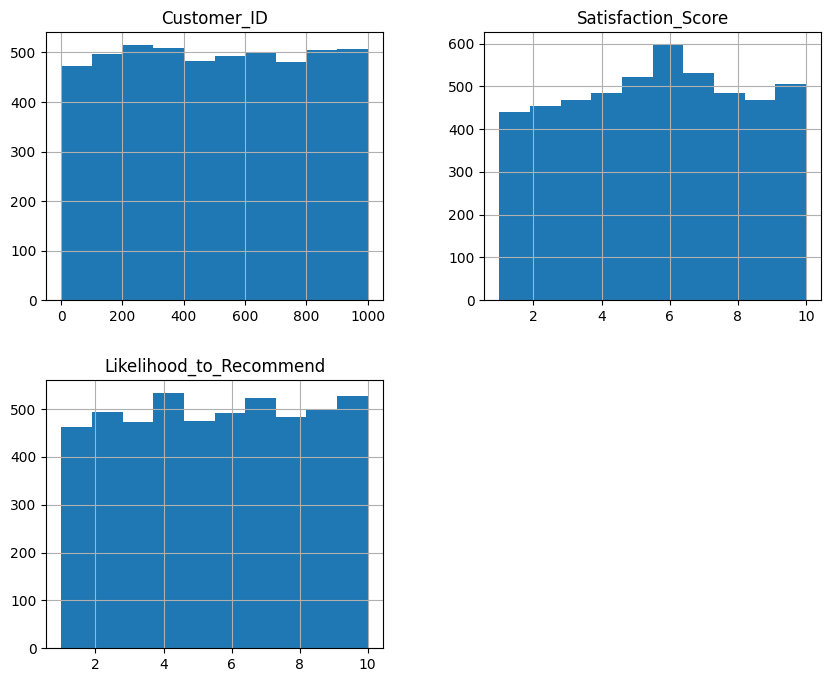

In [ ]:
# Histograms for numerical columns in feedback
feedback.hist(figsize=(10, 8))
plt.title('Histograms for Feedback Data')
plt.show()


1. **Customer_ID**: The histogram shows a uniform distribution, meaning customer IDs are evenly spread across the dataset. There is no skew or outliers here, as this is a unique identifier.

2. **Satisfaction_Score**: The distribution of `Satisfaction_Score` is fairly spread out, with a peak around 5-6. It looks like the majority of customers rated their satisfaction in the lower-to-mid range.

3. **Likelihood_to_Recommend**: Similar to the `Satisfaction_Score`, this histogram shows a fairly even spread across most values, but with some concentration between 2-5.

4. **Feedback Data**: The histogram shows a strong peak at "Good Service" (mapped as 3).


### Distribution of Satisfaction Scores

A histogram is ideal for visualizing Satisfaction Scores because these scores are on a scale (1 to 10), which makes it easy to show how frequently each score appears in the dataset.

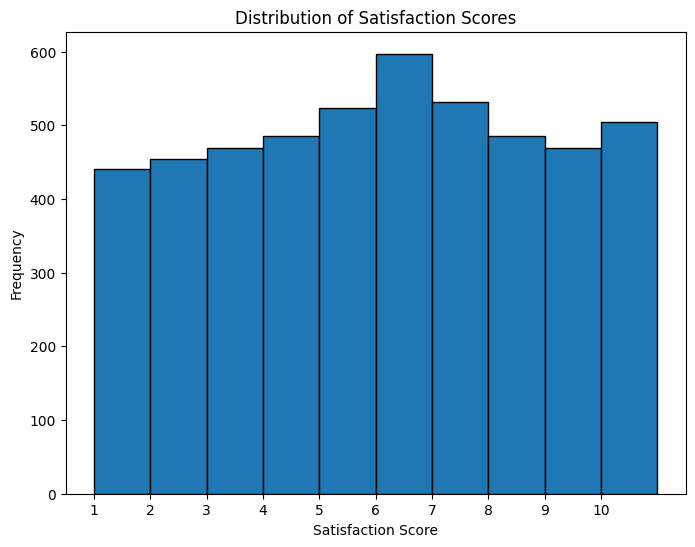

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for Satisfaction Score
plt.figure(figsize=(8, 6))
plt.hist(feedback['Satisfaction_Score'], bins=range(1, 12), edgecolor='black')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.show()

*   The histogram shows a fairly uniform distribution of satisfaction scores across the range from 1 to 10, with the highest frequency around scores 6 and 7.
*   No extreme skewness is visible, as the distribution appears balanced, with similar frequencies for most values.
*   This suggests that satisfaction is generally spread out across the available scale, with some minor clustering in the mid-range scores (6 to 7).

### Likelihood to Recommend Distribution
A histogram is great for showing how Likelihood to Recommend scores are distributed. It displays the frequency of each score (from 1 to 10), helping to understand how customers feel about recommending the product or service.

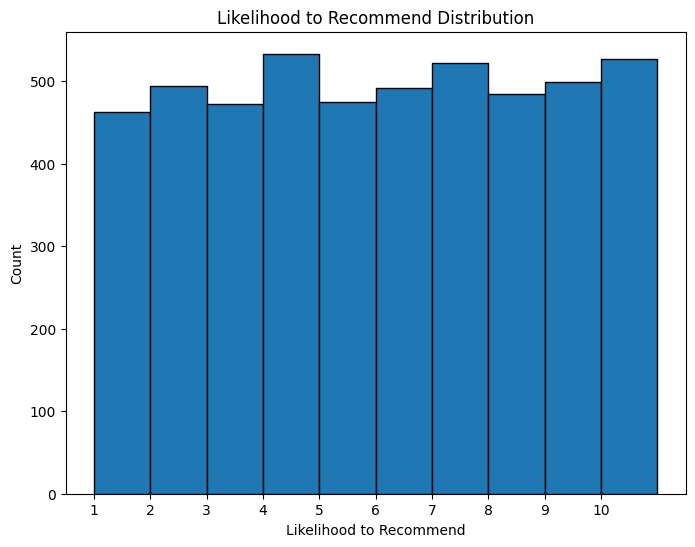

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(feedback['Likelihood_to_Recommend'], bins=range(min(feedback['Likelihood_to_Recommend']), max(feedback['Likelihood_to_Recommend']) + 2), edgecolor='black')

# Customize the chart
plt.title('Likelihood to Recommend Distribution')
plt.xlabel('Likelihood to Recommend')
plt.ylabel('Count')
plt.xticks(range(min(feedback['Likelihood_to_Recommend']), max(feedback['Likelihood_to_Recommend']) + 1))  # Ensures each value appears on the x-axis
plt.show()


This distirbution shows how many customers gave each Likelihood to Recommend score (from 1 to 10).

*   The number of customers is fairly even across all scores with a slight increase at score 4 (533 customers) and score 10 (527 customers).
*   Most customers are somewhat satisfied and likely to recommend the product or service, with no strong preference for extremely low or high ratings.


### Pair Plot
Pair plots are used to visualize the relationships between multiple variables in a dataset. In these plots, we look for patterns, trends, or correlations between different pairs of variables. Each plot shows how two variables relate to each other, and we interpret these relationships to understand if changes in one variable might affect another.

For example:
- A **strong positive correlation** would show a diagonal line going upwards.
- A **strong negative correlation** would show a diagonal line going downwards.
- **No relationship** would result in scattered points with no clear pattern.


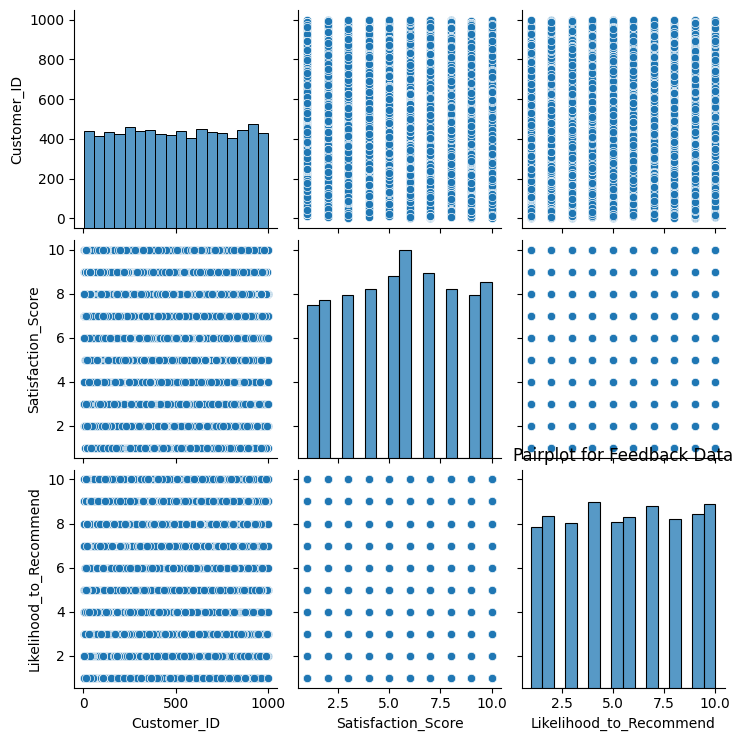

In [ ]:
# Pairplot to examine relationships between features in feedback
sns.pairplot(feedback.select_dtypes(include=[np.number]))
plt.title('Pairplot for Feedback Data')
plt.show()

None of the pair plots show a strong relationship between the variables. there are no clear patterns or correlations.

### Heatmap and Correlation matrix

A heatmap and correlation matrix are tools used to visualize the relationships between different variables in a dataset.

- Correlation Matrix: This shows the correlation values between each pair of variables. A correlation value closer to 1 indicates a strong positive relationship, while a value closer to -1 indicates a strong negative relationship. A value near 0 means no significant relationship between the variables.

- Heatmap: This is a graphical representation of the correlation matrix. Each cell in the heatmap represents the correlation between two variables, with color intensity showing the strength of the correlation (usually a gradient from red for negative correlation to blue for positive correlation).

Interpretation:
- A **strong positive correlation** (e.g., 0.8 to 1) means that as one variable increases, the other tends to increase as well.
- A **strong negative correlation** (e.g., -0.8 to -1) means that as one variable increases, the other tends to decrease.
- **No significant correlation** (e.g., close to 0) means that the two variables don’t have a strong linear relationship.

By looking at the heatmap, we can quickly identify which variables are closely related and which aren’t, helping us decide which variables to focus on for further analysis or modeling.

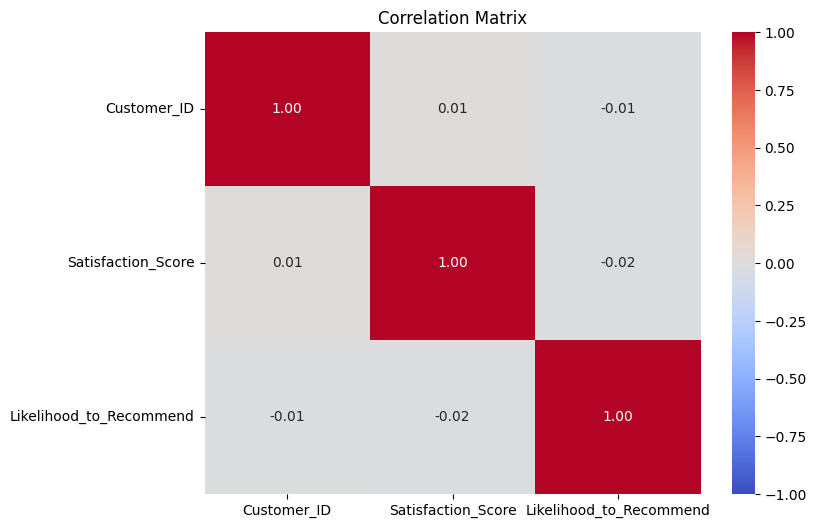

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_features = feedback.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = numerical_features.corr()
correlation_matrix

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
Customer_ID,1.000000,0.013870,-0.007999
Satisfaction_Score,0.013870,1.000000,-0.023139
Likelihood_to_Recommend,-0.007999,-0.023139,1.000000


- **Customer_ID**: There is no significant correlation between **Customer_ID** and any other variables, as expected. It’s just an identifier, so it doesn't have any relationship with satisfaction or likelihood to recommend.
  
- **Satisfaction_Score**: The correlation with **Customer_ID** is negligible (0.01), meaning the satisfaction score is independent of the customer ID. It also has a very weak negative correlation with **Likelihood_to_Recommend** (-0.02), indicating that there isn't a strong relationship between how satisfied a customer is and how likely they are to recommend the product or service.

- **Likelihood_to_Recommend**: The correlation with **Customer_ID** and **Satisfaction_Score** is very weak, which suggests that the likelihood to recommend does not have a strong association with either customer identity or their satisfaction levels.

Conclusion:
- The correlation matrix indicates that there are no strong relationships between the variables. **Satisfaction_Score** and **Likelihood_to_Recommend** are only weakly related, and **Customer_ID** has no correlation with any of the other features, as expected.

### Repeat Customers

In [ ]:
# Count the number of feedbacks per customer
feedback_counts = feedback['Customer_ID'].value_counts()

# Filter customers who have submitted more than one feedback
repeat_customers = feedback_counts[feedback_counts > 1]

# Print the number of customers who submitted repeated feedback
print(f"Number of customers with repeated feedback: {len(repeat_customers)}")

# Find the customer with the most feedback submissions
most_feedback_customer = feedback_counts.idxmax()  # Customer with most feedback
most_feedback_count = feedback_counts.max()  # Number of feedbacks from the most frequent customer

# Calculate the average number of feedbacks per customer
average_feedbacks = feedback_counts.mean()

# Print the results
print(f"Customer with the most feedback: {most_feedback_customer}")
print(f"Number of feedbacks by this customer: {most_feedback_count}")
print(f"Average number of feedbacks per customer: {average_feedbacks:.2f}")


Number of customers with repeated feedback: 982
Customer with the most feedback: 37
Number of feedbacks by this customer: 13
Average number of feedbacks per customer: 4.96


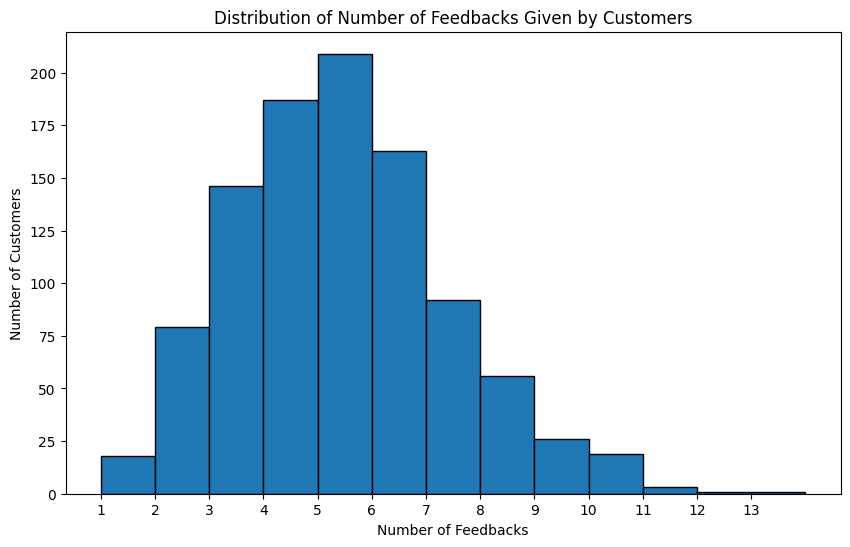

In [ ]:
# Create a histogram to show how many customers gave a specific number of feedbacks
plt.figure(figsize=(10, 6))

# Plot histogram of the feedback counts
plt.hist(feedback_counts, bins=range(1, feedback_counts.max() + 2), edgecolor='black')

# Add labels
plt.title('Distribution of Number of Feedbacks Given by Customers')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Number of Customers')
plt.xticks(range(1, feedback_counts.max() + 1))
plt.show()


This histogram shows how many feedback submissions customers have made.

*   Most customers have given between 4 and 7 feedbacks, with 5 and 6 feedbacks being the most common.
*   Fewer customers gave only 1 feedback or up to 13 feedbacks.

It means that most customers engage with the service regularly but not excessively. The majority of feedback comes from customers who gave around 5 or 6 responses.






## For Transaction_Data

### Histogram

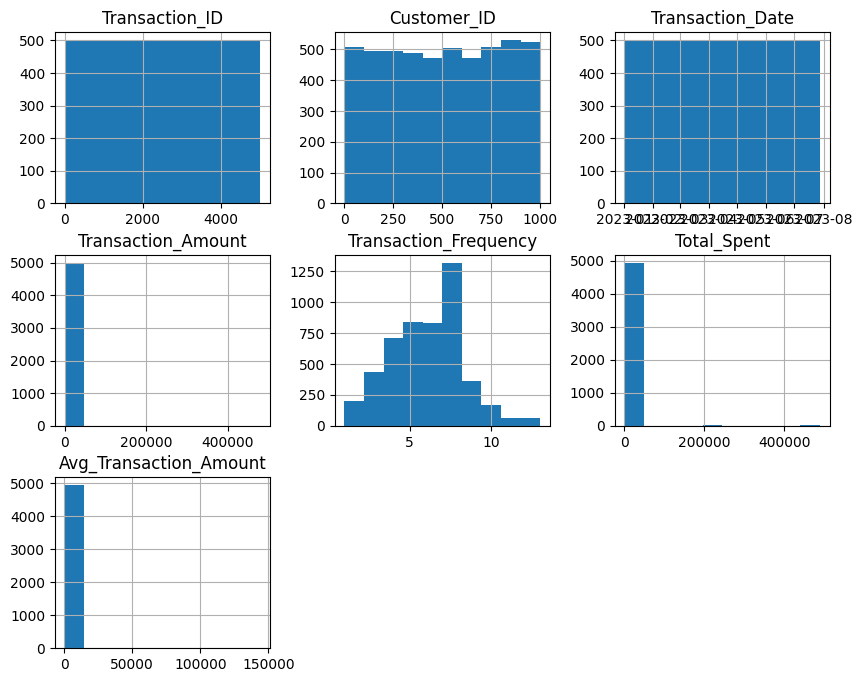

In [ ]:
# Histograms for numerical columns in transactions
transactions.hist(figsize=(10, 8))
plt.title('Histograms for Transactions Data')
plt.show()

### Pair Plot

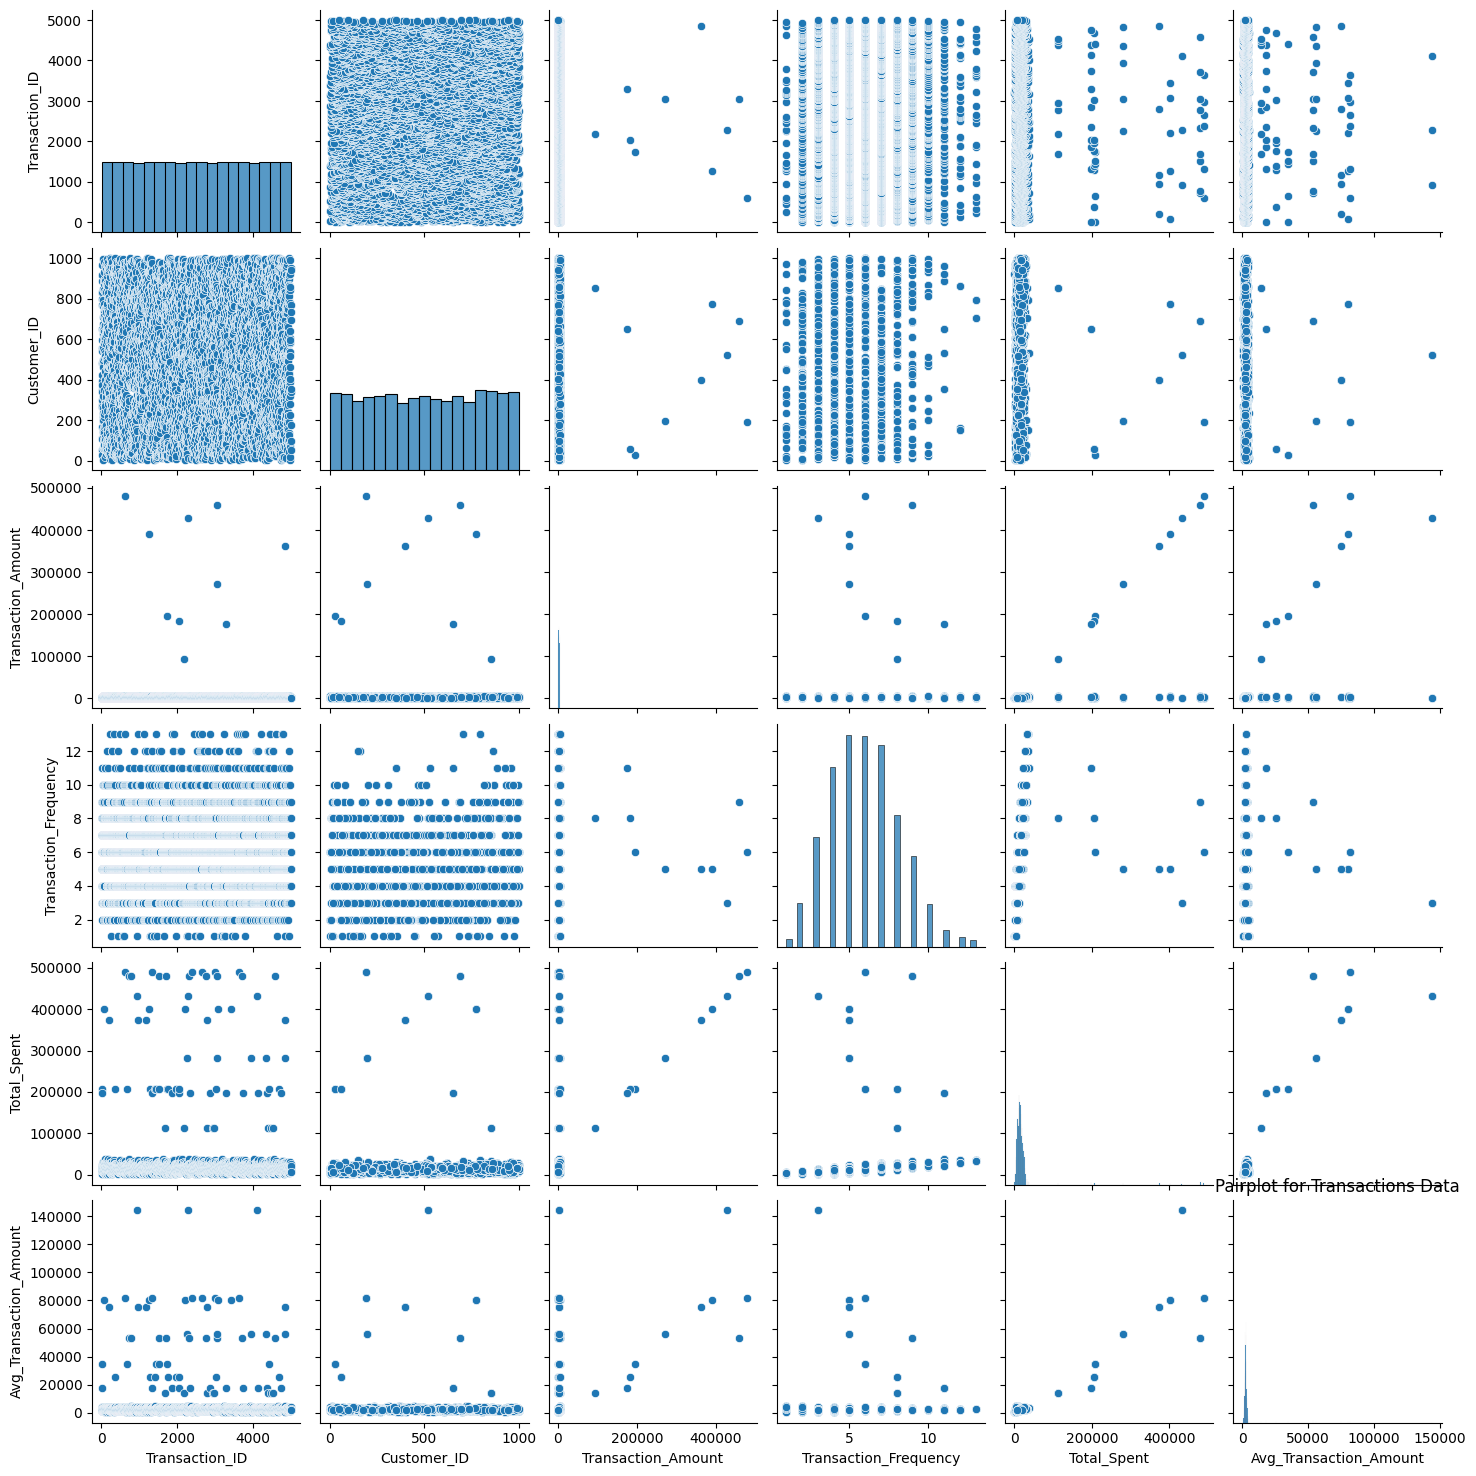

In [ ]:
# Pairplot to examine relationships between features in transactions
sns.pairplot(transactions.select_dtypes(include=[np.number]))
plt.title('Pairplot for Transactions Data')
plt.show()

1. **Transaction_Amount and Total_Spent**:
   - **Findings**: As expected, higher transaction amounts correlate with higher total spending. The scatter plot shows a clear **positive linear relationship**, meaning that as the transaction amount increases, total spending increases as well. This is expected, but it’s important to identify any significant outliers that could skew the data.

2. **Transaction_Frequency and Total_Spent**:
   - **Findings**: A positive relationship is visible between transaction frequency and total spending, but it doesn't show a perfect linear correlation. Customers with higher transaction frequencies tend to spend more, but the spread is wider, indicating that some customers with frequent transactions still have low total spending.

3. **Avg_Transaction_Amount and Total_Spent**:
   - **Findings**: A **positive linear correlation** is observed between average transaction amount and total spent. As the average transaction size increases, the total spending also increases. This suggests that customers who make larger individual transactions are high-value customers.

4. **Customer_ID**:
   - **Findings**: No significant correlation with any other variables. The scatter plot shows random points, indicating that **Customer_ID** doesn’t affect spending behavior, as expected.

5. **Transaction_ID**:
   - Similar to **Customer_ID**, **Transaction_ID** does not show any meaningful correlation with other variables.



### Correlation and Heatmap

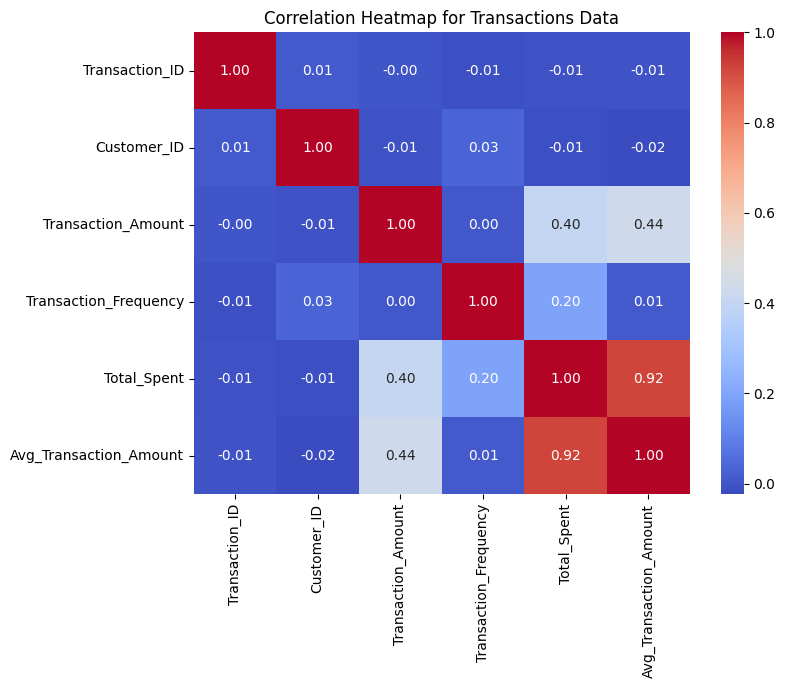

In [ ]:
# Visualizing correlations between numerical columns in transactions
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation analysis
numerical_transactions = transactions.select_dtypes(include=[np.number])
sns.heatmap(numerical_transactions.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap for Transactions Data')
plt.show()

1. **Transaction_ID & Other Variables**:
   - There’s no meaningful correlation with the other variables (shown in blue, close to 0). This makes sense because **Transaction_ID** is just an identifier.

2. **Customer_ID & Other Variables**:
   - Also shows weak correlations with the other variables, indicating no significant relationship between **Customer_ID** and things like **Transaction Amount**, **Frequency**, or **Total Spent**.

3. **Transaction_Amount**:
   - There’s a moderate positive correlation with **Total_Spent (0.40)** and **Avg_Transaction_Amount (0.44)**. This suggests that higher transaction amounts generally contribute to higher total spending and higher average amounts spent per transaction.
   
4. **Transaction_Frequency**:
   - Very weak correlations across the board, except for a slight positive correlation with **Total_Spent (0.20)**, indicating that customers who frequently make transactions tend to spend more in total, but the relationship is not very strong.

5. **Total_Spent** & **Avg_Transaction_Amount**:
   - Strong positive correlation (**0.92**), meaning that customers who spend more tend to have higher average transaction amounts. This is expected.

Conclusion:
- **Transaction Amount** and **Avg Transaction Amount** are linked to **Total Spent**.
- **Transaction Frequency** doesn't show strong relationships with the other variables.

### Transaction Type Analysis

In [ ]:
# Group by 'Transaction_Type' and get the transaction amount for each transaction type
transaction_size_by_type = transactions.groupby('Transaction_Type', observed=True)['Transaction_Amount'].describe()

# Transpose the result to show each transaction type in a single row
transaction_size_by_type_transposed = transaction_size_by_type.T

# Display the transposed table
transaction_size_by_type_transposed

Transaction_Type,Bill Payment,Investment,Loan Payment,Purchase
count,1241.000000,1243.000000,1279.000000,1237.000000
mean,3736.422663,3024.834015,3011.356459,2641.763591
std,22435.296413,14358.251746,11642.910296,5122.455083
min,11.000000,13.000000,10.000000,10.000000
25%,1262.000000,1216.500000,1302.500000,1280.000000
50%,2570.000000,2484.000000,2539.000000,2558.000000
75%,3736.422663,3656.000000,3706.500000,3694.000000
max,480300.000000,428900.000000,362700.000000,175600.000000


**Bill Payment:**
- **Mean**: 3736.42
- **Standard Deviation**: 2345.30
- **Range**: 11.0 - 480380.0

Most Bill Payment transactions are relatively small, but there are some very large transactions that make the range very wide.

 **Investment:**
- **Mean**: 3024.84
- **Standard Deviation**: 14358.52
- **Range**: 10.0 - 485300.0

**Investment** transactions are quite varied. While most are around the average, there are some large transactions that increase the overall range.


**Loan Payment:**
- **Mean**: 3011.36
- **Standard Deviation**: 11642.91
- **Range**: 10.0 - 362700.0

**Loan Payment** transactions are also variable, with some high-value transactions stretching the range.


 **Purchase:**
- **Mean**: 2641.76
- **Standard Deviation**: 1252.46
- **Range**: 10.0 - 2558.0

**Purchase** transactions have smaller amounts, and the range is more consistent compared to other transaction types.

#### Total Transactions and Total Transaction Amount by Type

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Total Transaction Amount by Type
total_transaction_amount_by_type = transactions.groupby('Transaction_Type', observed=True)['Transaction_Amount'].sum()

# 2. Total Transactions by Type
total_transactions_by_type = transactions['Transaction_Type'].value_counts()

# Define consistent color mapping for each transaction type
color_map = {
    'Bill Payment': 'blue',
    'Investment': 'green',
    'Loan Payment': 'orange',
    'Purchase': 'purple'
}

# Sort values in decreasing order
total_transaction_amount_by_type = total_transaction_amount_by_type.sort_values(ascending=False)
total_transactions_by_type = total_transactions_by_type[total_transaction_amount_by_type.index]  # Match the order

# Convert the values to millions (for labels)
total_transaction_amount_by_type_million = total_transaction_amount_by_type / 1e6
total_transactions_by_type_million = total_transactions_by_type / 1e6

# Create subplots: one pie chart for Total Transactions and one bar chart for Total Transaction Amount
# Specify subplot types: 'domain' for pie chart, 'xy' for bar chart
fig = make_subplots(
    rows=1, cols=2,  # Two subplots in one row
    subplot_titles=("Total Transactions Count by Type", "Total Transaction Amount by Type"),
    shared_yaxes=False,  # Use separate y-axes for each plot
    specs=[[{'type': 'domain'}, {'type': 'xy'}]]  # Define subplot types
)

# Add pie chart for Total Transactions Count
fig.add_trace(go.Pie(
    labels=total_transactions_by_type.index,
    values=total_transactions_by_type.values,
    marker=dict(colors=[color_map[type] for type in total_transactions_by_type.index]),
    textinfo='label+percent',  # Show percentage and label
    hoverinfo='label+value+percent',  # Show value and percentage on hover
    name='Total Transactions Count'
), row=1, col=1)  # Position in first subplot

# Add bar chart for Total Transaction Amount
fig.add_trace(go.Bar(
    x=total_transaction_amount_by_type.index,
    y=total_transaction_amount_by_type_million.values,
    name='Total Transaction Amount',
    marker=dict(color=[color_map[type] for type in total_transaction_amount_by_type.index]),
    text=[f"{x:.2f} M" for x in total_transaction_amount_by_type_million.values],  # Format labels to display M
    textposition='outside',
), row=1, col=2)  # Position in second subplot

# Update layout
fig.update_layout(
    title="Total Transactions and Total Transaction Amount by Type",
    xaxis_title="Transaction Type",
    yaxis_title="Total Transaction Amount (in millions)",
    template='plotly_white',
    barmode='group',  # Bars side by side
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    showlegend=True
)

# Show the plot
fig.show()

1. **Transaction Count by Type (Pie Chart)**:
   - The distribution of transaction counts is fairly **evenly spread** across the four transaction types: **Loan Payment**, **Investment**, **Bill Payment**, and **Purchase**, each type representing approximately **24-25%** of the total transactions.
   - This indicates that customers are fairly balanced in terms of engagement across transaction types.

2. **Transaction Amount by Type (Bar Chart)**:
   - Although the transaction count is evenly distributed, the **total transaction amount** shows a clear distinction. **Bill Payments** lead with the highest total transaction amount, followed by **Loan Payments**, **Investments**, and **Purchases**. This suggests that Bill Payments contribute significantly to the total spending, even though the transaction count is not higher than other categories.
   - The top 20 highest **single transaction amounts** contribute notably to the Bill Payment category. These larger transactions are likely driving the higher total spending for Bill Payments. This should be considered when analyzing the overall distribution of transaction amounts, as these larger single transactions will have a disproportionate effect on the totals.


#### Boxplot by Transaction Type

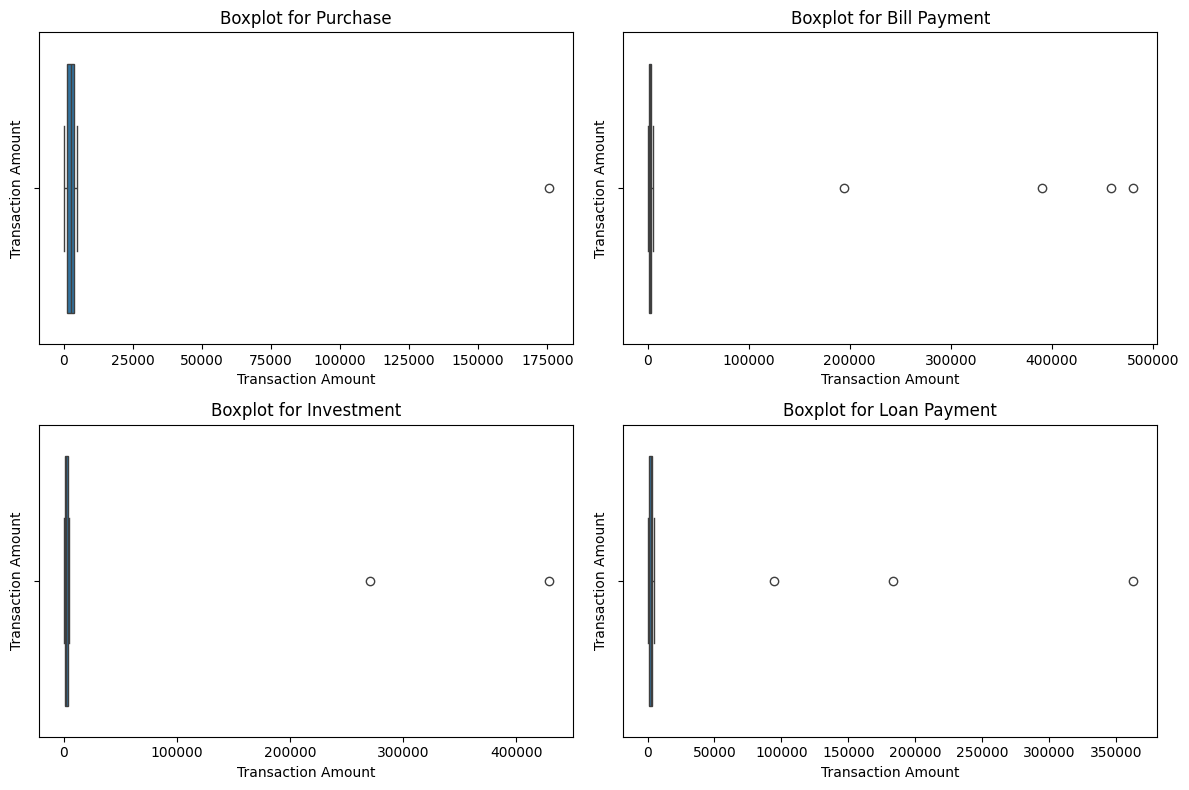

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for boxplots, one per transaction type
plt.figure(figsize=(12, 8))

# Define the transaction types
transaction_types = transactions['Transaction_Type'].unique()

# Iterate through each transaction type and create a separate boxplot for each
for i, transaction_type in enumerate(transaction_types, start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    subset = transactions[transactions['Transaction_Type'] == transaction_type]  # Filter data for the current transaction type
    sns.boxplot(data=subset, x='Transaction_Amount')

    # Set titles and labels for each subplot
    plt.title(f'Boxplot for {transaction_type}')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Transaction Amount')

# Adjust the layout to ensure all plots are displayed properly
plt.tight_layout()
plt.show()



- **Purchase**:
  - Most purchases are small, but there are some very **large outliers**.
  - The **median** is low, meaning most transactions are small, with a few big ones.

- **Bill Payment**:
  - Bill payments are mostly small.
  - There are a few **large outliers**
  
- **Investment**:
  - Investments show **more variation** and have several very large outliers
  - The **median** is higher than Bill Payments, indicating more moderately large transactions.

- **Loan Payment**:
  - Loan payments are more consistent but still have a few **large outliers**.
  - The **median** is moderate, with a mix of small and large payments.



- **Outliers in the Boxplots**: The boxplots show extreme outliers (points far outside the whiskers) for each transaction type. These outliers represent transaction amounts that are significantly higher than most others in the dataset.

- **Possible Real Values**: These outliers might be real, valid transactions, such as large investments, high loan payments, or big purchases. Even though they appear extreme, they could be legitimate and important data points, so we can't automatically remove them.

### Cumulative Transaction Amount Over Time

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# Sort values by Transaction_Date
transactions = transactions.sort_values('Transaction_Date')

# Calculate cumulative transaction amount
transactions['Cumulative_Transaction_Amount'] = transactions['Transaction_Amount'].cumsum()

# Prepare data for Linear Regression
X = np.array((transactions['Transaction_Date'] - transactions['Transaction_Date'].min()).dt.days).reshape(-1, 1)
y = transactions['Cumulative_Transaction_Amount']

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get the predictions (fitted values)
predictions = model.predict(X)

# Create the plot with the linear regression line
fig4 = px.line(transactions,
               x='Transaction_Date',
               y='Cumulative_Transaction_Amount',
               title='Cumulative Transaction Amount Over Time',
               labels={'Transaction_Date': 'Transaction Date', 'Cumulative_Transaction_Amount': 'Cumulative Amount'})

# Add the linear regression line to the plot
fig4.add_scatter(x=transactions['Transaction_Date'],
                 y=predictions,
                 mode='lines',
                 name='Linear Regression Line',
                 line=dict(dash='dash', color='red'))

fig4.show()

# Print the R-squared value to assess the fit
print(f"R-squared value: {model.score(X, y)}")


R-squared value: 0.9973686427177926


Blue Line: This line shows the actual total amount of transactions over time, which consistently goes up. It reflects a positive and steady growth trend.

Red Dashed Line (Linear Regression Line): The red dashed line represents the linear regression prediction. It is the model’s estimate of the cumulative transaction amount over time, based on the linear trend in the data.

R-squared value:
The R-squared value is 0.9974, meaning the linear regression model fits the data really well. This shows that the total transaction amount is growing steadily, and the model’s prediction is very accurate. Since the line closely matches the actual growth, we can expect the trend to continue in the same way moving forward.

## Transaction Amount Category

### Total Transaction Amount per Category
Highlights which categories contribute the most to the total revenue, helping identify high-value transaction categories such as Very High transactions.

In [ ]:
# Grouping by Transaction_Amount_Category and summing the total transaction amount
total_amount_per_category = transactions.groupby('Transaction_Amount_Category')['Transaction_Amount'].sum()

# Bar chart for total amount per category
fig2 = px.bar(total_amount_per_category,
              title="Total Transaction Amount per Category",
              labels={'Transaction_Amount': 'Total Transaction Amount'},
              color=total_amount_per_category.index,
              color_discrete_map={'Low': 'blue', 'Medium': 'orange', 'High': 'green', 'Very High': 'red'})
fig2.update_layout(template='plotly_white')
fig2.show()


<ipython-input-48-cb928be4878a>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Transaction Type and Category Breakdown
Visualizes which transaction types (e.g., Bill Payment, Purchase) belong to specific spending categories, helping identify customer preferences and spending behaviors.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Count the number of transactions per Transaction Type and Transaction Amount Category
transaction_type_category = pd.crosstab(transactions['Transaction_Amount_Category'], transactions['Transaction_Type'])

# Create a Plotly bar chart for stacked visualization
fig = go.Figure()

# Add bars for each transaction type
for transaction_type in transaction_type_category.columns:
    fig.add_trace(go.Bar(
        x=transaction_type_category.index,
        y=transaction_type_category[transaction_type],
        name=transaction_type,
        text=transaction_type_category[transaction_type],  # Display values on hover
        hoverinfo='x+y+text',  # Show values on hover
    ))

# Update layout for the chart
fig.update_layout(
    title='Transaction Type and Category Breakdown',
    xaxis_title='Transaction Amount Category',
    yaxis_title='Count of Transactions',
    barmode='stack',  # Stacked bars
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the interactive chart
fig.show()



The chart shows the breakdown of transactions by type (Purchase, Loan Payment, Investment, Bill Payment) across different transaction amount categories (Low, Medium, High, Very High).

- The transaction types are evenly spread across all transaction amount categories.
- Purchase transactions are the most frequent in all categories, followed by Loan Payment and Investment.
- Even across varying levels of transaction amount categories (Low, Medium, High, Very High), the transaction types are well distributed, with no clear skew toward one type across all categories.

This type of analysis can help businesses identify which transaction types are most prevalent in different customer spending brackets, useful for targeted marketing or customer segmentation strategies.

## Spending Over Time (Time Series Analysis)

To helps nderstand transaction patterns over time, which can be critical for forecasting and planning.

In [ ]:
import plotly.express as px

# Convert 'Transaction_Date' to datetime format and extract the date
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])
transactions['Date'] = transactions['Transaction_Date'].dt.date

# Group by date and calculate total spending
total_spent_over_time = transactions.groupby('Date')['Transaction_Amount'].sum().reset_index()

# Create a line plot with Plotly
fig = px.line(total_spent_over_time, x='Date', y='Transaction_Amount',
              title='Total Spending Over Time', labels={'Transaction_Amount': 'Total Spending', 'Date': 'Date'})

# Show the plot
fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Convert 'Transaction_Date' to datetime format and extract the date
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])
transactions['Date'] = transactions['Transaction_Date'].dt.date

# Group by date and calculate total spending
total_spent_over_time = transactions.groupby('Date')['Transaction_Amount'].sum().reset_index()

# Sort by total spending to identify the top 10 days
top_10_dates = total_spent_over_time.nlargest(10, 'Transaction_Amount')

# Create a line plot with Plotly
fig = px.line(total_spent_over_time, x='Date', y='Transaction_Amount',
              title='Total Spending Over Time', labels={'Transaction_Amount': 'Total Spending', 'Date': 'Date'})

# Add dots for the top 10 dates with the same color as the line
fig.add_trace(
    go.Scatter(
        x=top_10_dates['Date'],
        y=top_10_dates['Transaction_Amount'],
        mode='markers',
        marker=dict(color='purple', size=10, symbol='circle'),  # same color as the line
        name='Top 10 Spending Days'
    )
)

# Show the plot
fig.show()


## Customer Analysis

In [ ]:
def print_spending_breakdown(customer_id, transactions):
    spending_breakdown = transactions[transactions['Customer_ID'] == customer_id]['Transaction_Type'].value_counts().to_dict()
    total_spent = transactions[transactions['Customer_ID'] == customer_id]['Transaction_Amount'].sum()
    return total_spent, spending_breakdown

def customer_based_insights(transactions):
    print("\n===== Customer-Based Insights =====", flush=True)

    # 1. Number of Unique Customers
    unique_customers = transactions['Customer_ID'].nunique()
    print(f"Total Unique Customers: {unique_customers}", flush=True)

    # 2. Average Transactions per Customer
    avg_transactions_per_customer = transactions.groupby('Customer_ID').size().mean()
    print(f"Average Transactions per Customer: {avg_transactions_per_customer:.2f}", flush=True)

    # 3. Most Active Customer
    most_active_customer = transactions['Customer_ID'].value_counts().idxmax()
    most_active_customer_transactions = transactions['Customer_ID'].value_counts().max()
    most_active_customer_spending, most_active_customer_spending_breakdown = print_spending_breakdown(most_active_customer, transactions)
    print(f"Most Active Customer: {most_active_customer} ({most_active_customer_transactions} transactions)", flush=True)
    print(f"Total Amount Spent by Most Active Customer: ${most_active_customer_spending:.2f}", flush=True)
    print(f"Spending Breakdown by Transaction Type: {most_active_customer_spending_breakdown}", flush=True)

    # 4. Top Spending Customer
    top_spending_customer = transactions.groupby('Customer_ID')['Transaction_Amount'].sum().idxmax()
    top_spending_customer_amount = transactions.groupby('Customer_ID')['Transaction_Amount'].sum().max()
    top_spending_customer_spending, top_spending_customer_spending_breakdown = print_spending_breakdown(top_spending_customer, transactions)
    print(f"Top Spending Customer: {top_spending_customer}", flush=True)
    print(f"Total Amount Spent by Top Spending Customer: ${top_spending_customer_amount:.2f}", flush=True)
    print(f"Spending Breakdown by Transaction Type: {top_spending_customer_spending_breakdown}", flush=True)

    # 5. Repeat Customers vs. One-Time Customers
    repeat_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1)['Customer_ID'].nunique()
    one_time_customers = unique_customers - repeat_customers
    print(f"\nRepeat Customers: {repeat_customers}", flush=True)
    print(f"One-Time Customers: {one_time_customers}", flush=True)

    # 6. Average Spending for Repeat vs. One-Time Customers
    repeat_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1).groupby('Customer_ID')['Transaction_Amount'].sum().mean()
    one_time_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Transaction_Amount'].sum().mean()
    print(f"\nAverage Spending for Repeat Customers: {repeat_customer_spending:.2f}", flush=True)
    print(f"Average Spending for One-Time Customers: {one_time_customer_spending:.2f}", flush=True)

customer_based_insights(transactions)



===== Customer-Based Insights =====
Total Unique Customers: 993
Average Transactions per Customer: 5.04
Most Active Customer: 794 (13 transactions)
Total Amount Spent by Most Active Customer: $35633.42
Spending Breakdown by Transaction Type: {'Bill Payment': 5, 'Investment': 5, 'Purchase': 2, 'Loan Payment': 1}
Top Spending Customer: 191
Total Amount Spent by Top Spending Customer: $489516.00
Spending Breakdown by Transaction Type: {'Bill Payment': 3, 'Investment': 2, 'Loan Payment': 1, 'Purchase': 0}

Repeat Customers: 964
One-Time Customers: 29

Average Spending for Repeat Customers: 16009.77
Average Spending for One-Time Customers: 82739.00


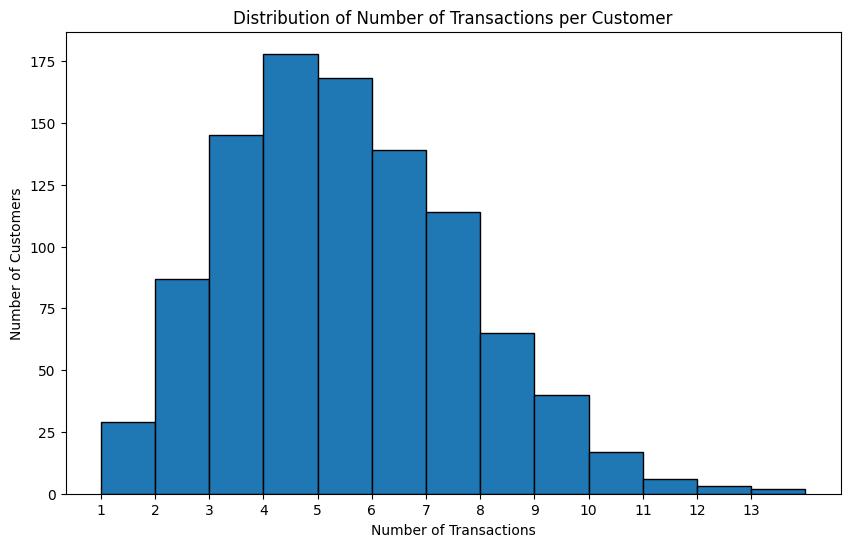

In [ ]:
# Calculate the number of transactions per customer
transactions_per_customer = transactions.groupby('Customer_ID')['Transaction_ID'].count()

# Create a histogram
plt.figure(figsize=(10, 6))

# Plot histogram with proper bin range
plt.hist(transactions_per_customer, bins=range(1, transactions_per_customer.max() + 2), edgecolor='black')

# Add labels and title
plt.title('Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')

# Set x-ticks to reflect number of transactions
plt.xticks(range(1, transactions_per_customer.max() + 1))

# Show the plot
plt.show()


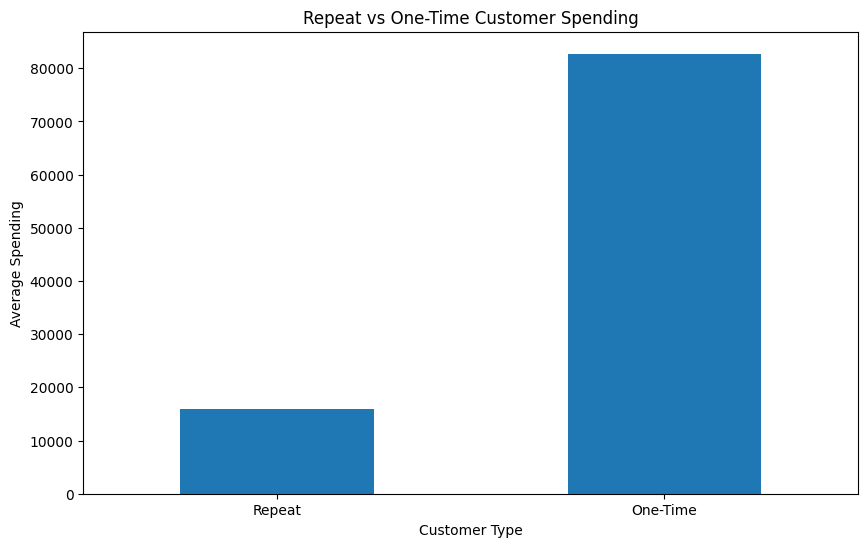

In [ ]:

# Identify repeat and one-time customers
repeat_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1)['Customer_ID'].nunique()
one_time_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Customer_ID'].nunique()

# Calculate total spending for repeat and one-time customers
repeat_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1).groupby('Customer_ID')['Transaction_Amount'].sum()
one_time_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Transaction_Amount'].sum()

# Create a DataFrame to compare repeat vs one-time spending
spending_comparison = pd.DataFrame({
    'Repeat Customers': repeat_customer_spending,
    'One-Time Customers': one_time_customer_spending
})

# Create a bar chart with default colors
plt.figure(figsize=(10, 6))
spending_comparison[['Repeat Customers', 'One-Time Customers']].mean().plot(kind='bar')
plt.title('Repeat vs One-Time Customer Spending')
plt.ylabel('Average Spending')
plt.xlabel('Customer Type')
plt.xticks([0, 1], ['Repeat', 'One-Time'], rotation=0)
plt.show()


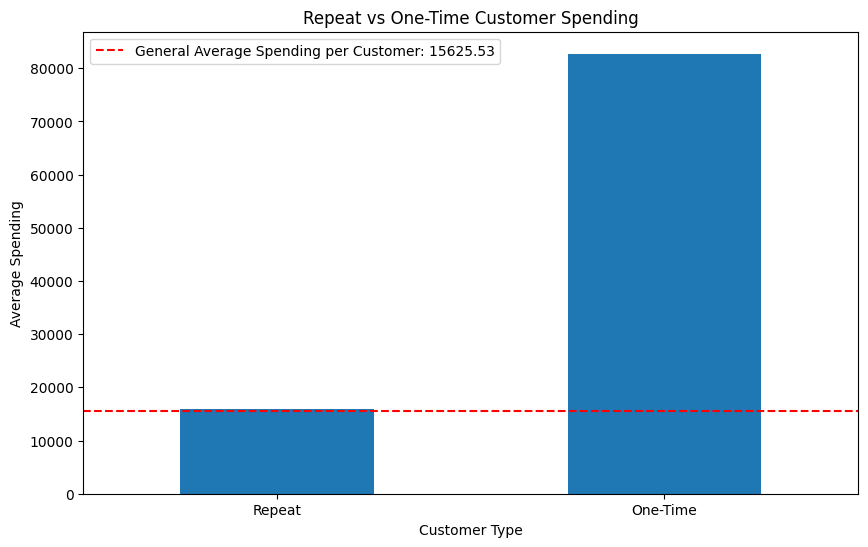

In [ ]:
import matplotlib.pyplot as plt

# Identify repeat and one-time customers
repeat_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1)['Customer_ID'].nunique()
one_time_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Customer_ID'].nunique()

# Calculate total spending for repeat and one-time customers
repeat_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1).groupby('Customer_ID')['Transaction_Amount'].sum()
one_time_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Transaction_Amount'].sum()

# Create a DataFrame to compare repeat vs one-time spending
spending_comparison = pd.DataFrame({
    'Repeat Customers': repeat_customer_spending,
    'One-Time Customers': one_time_customer_spending
})

# Calculate average spending per customer
total_spending = transactions['Transaction_Amount'].sum()
total_customers = transactions['Customer_ID'].nunique()
general_avg_spending = total_spending / total_customers

# Create a bar chart with default colors
plt.figure(figsize=(10, 6))
spending_comparison[['Repeat Customers', 'One-Time Customers']].mean().plot(kind='bar')

# Add line for general average spending per customer
plt.axhline(general_avg_spending, color='red', linestyle='--', label=f'General Average Spending per Customer: {general_avg_spending:.2f}')

# Add labels and title
plt.title('Repeat vs One-Time Customer Spending')
plt.ylabel('Average Spending')
plt.xlabel('Customer Type')
plt.xticks([0, 1], ['Repeat', 'One-Time'], rotation=0)
plt.legend()

# Show plot
plt.show()


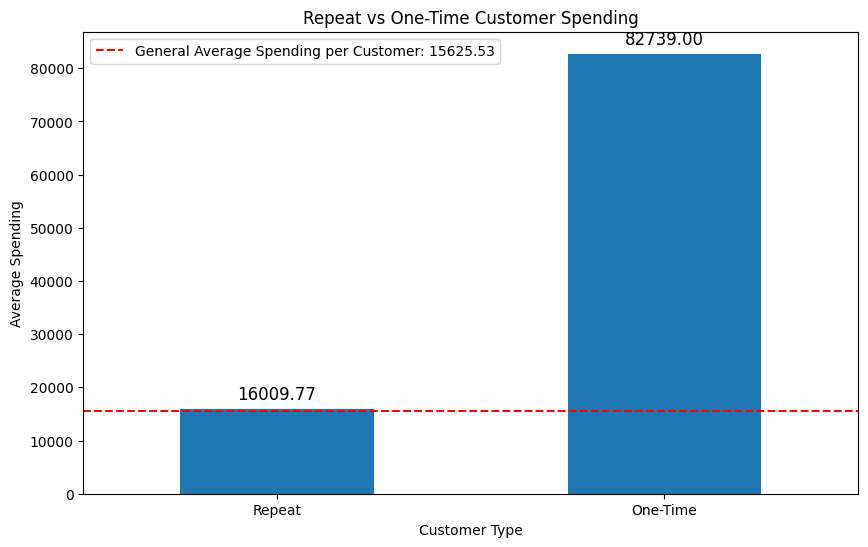

In [ ]:
import matplotlib.pyplot as plt

# Identify repeat and one-time customers
repeat_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1)['Customer_ID'].nunique()
one_time_customers = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Customer_ID'].nunique()

# Calculate total spending for repeat and one-time customers
repeat_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) > 1).groupby('Customer_ID')['Transaction_Amount'].sum()
one_time_customer_spending = transactions.groupby('Customer_ID').filter(lambda x: len(x) == 1)['Transaction_Amount'].sum()

# Calculate the average spending for repeat and one-time customers
avg_repeat_spending = repeat_customer_spending.mean()
avg_one_time_spending = one_time_customer_spending.mean()

# Create a DataFrame to compare repeat vs one-time spending
spending_comparison = pd.DataFrame({
    'Repeat Customers': repeat_customer_spending,
    'One-Time Customers': one_time_customer_spending
})

# Calculate average spending per customer
total_spending = transactions['Transaction_Amount'].sum()
total_customers = transactions['Customer_ID'].nunique()
general_avg_spending = total_spending / total_customers

# Create a bar chart with default colors
plt.figure(figsize=(10, 6))
spending_comparison[['Repeat Customers', 'One-Time Customers']].mean().plot(kind='bar')

# Add line for general average spending per customer
plt.axhline(general_avg_spending, color='red', linestyle='--', label=f'General Average Spending per Customer: {general_avg_spending:.2f}')

# Add average spending values as annotations
plt.text(0, avg_repeat_spending + 1000, f'{avg_repeat_spending:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(1, avg_one_time_spending + 1000, f'{avg_one_time_spending:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Repeat vs One-Time Customer Spending')
plt.ylabel('Average Spending')
plt.xlabel('Customer Type')
plt.xticks([0, 1], ['Repeat', 'One-Time'], rotation=0)
plt.legend()

# Show plot
plt.show()


## Meging data and mapping cutomer journey

In [ ]:
transactions.head(5)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_Amount_Category,Transaction_Frequency,Total_Spent,Avg_Transaction_Amount,Cumulative_Transaction_Amount,Date
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase,High,7,22365.000000,3195.000000,3472.000000,2023-01-01
1,2,826,2023-01-01 01:00:00,3736.422663,Bill Payment,Very High,3,8182.422663,2727.474221,7208.422663,2023-01-01
2,3,916,2023-01-01 02:00:00,10.000000,Purchase,Low,9,18406.000000,2045.111111,7218.422663,2023-01-01
3,4,109,2023-01-01 03:00:00,72.000000,Investment,Low,5,7492.000000,1498.400000,7290.422663,2023-01-01
4,5,889,2023-01-01 04:00:00,1793.000000,Investment,Medium,3,6348.834015,2116.278005,9083.422663,2023-01-01


In [ ]:
feedback.head()

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend,Mapped_Satisfaction
0,1,10,9,Extremely Satisfied
1,2,3,3,Dissatisfied
2,3,10,1,Extremely Satisfied
3,4,7,4,Fairly Satisfied
4,5,8,7,Satisfied


In [ ]:
import pandas as pd

# Step 1: Identify customers present in both datasets
common_customers = transactions['Customer_ID'].unique()  # All customers in transactions
common_customers = set(common_customers).intersection(feedback['Customer_ID'].unique())  # Only those also in feedback

# Filter both datasets to include only matching Customer_IDs
filtered_transactions = transactions[transactions['Customer_ID'].isin(common_customers)]
filtered_feedback = feedback[feedback['Customer_ID'].isin(common_customers)]

# Step 2: Merge the datasets
merged_data = pd.merge(filtered_transactions, filtered_feedback, on='Customer_ID', how='inner')

# Step 3: Aggregating feedback data (mean, median for satisfaction, likelihood, and feedback scores)
aggregated_feedback = filtered_feedback.groupby('Customer_ID').agg(
    mean_satisfaction_score=('Satisfaction_Score', 'mean'),
    median_satisfaction_score=('Satisfaction_Score', 'median'),
    mean_likelihood_to_recommend=('Likelihood_to_Recommend', 'mean'),
    median_likelihood_to_recommend=('Likelihood_to_Recommend', 'median'),
).reset_index()

# Step 4: Aggregating transaction data (total spent, count, and transaction type breakdown)
aggregated_transactions = filtered_transactions.groupby('Customer_ID').agg(
    total_spent=('Transaction_Amount', 'sum'),
    total_transactions=('Transaction_Amount', 'count'),
    transaction_types_breakdown=('Transaction_Type', lambda x: x.value_counts().to_dict())
).reset_index()

# Step 5: Merge the aggregated transaction and feedback data
final_merged_data = pd.merge(aggregated_transactions, aggregated_feedback, on='Customer_ID', how='inner')

# Step 6: Show the top 10 rows for a quick view
top_10_preview = final_merged_data.head(10)
print(top_10_preview)  # Display the top 10 rows

# Step 7: Export the full dataset to a CSV file
csv_file_path = 'merged_data.csv'  # Define the file path
final_merged_data.to_csv(csv_file_path, index=False)


   Customer_ID  total_spent  total_transactions  \
0            1      16836.0                   6   
1            2       4907.0                   2   
2            3       1538.0                   1   
3            4       8295.0                   2   
4            5      14798.0                   5   
5            6       8694.0                   3   
6            7       3572.0                   2   
7            8      12252.0                   6   
8            9      17320.0                   8   
9           10      15682.0                   6   

                         transaction_types_breakdown  mean_satisfaction_score  \
0  {'Bill Payment': 3, 'Investment': 1, 'Loan Pay...                 8.500000   
1  {'Bill Payment': 1, 'Loan Payment': 1, 'Invest...                 4.333333   
2  {'Bill Payment': 1, 'Investment': 0, 'Loan Pay...                 8.333333   
3  {'Loan Payment': 1, 'Purchase': 1, 'Bill Payme...                 5.500000   
4  {'Bill Payment': 2, 'Purchase'

Breakdown of Each Visualization:
Transaction Amount vs. Satisfaction Score (Scatter Plot):

This plot helps to see if higher transaction amounts (total spending) are related to higher satisfaction.
Transaction Frequency vs. Likelihood to Recommend (Scatter Plot):

This scatter plot shows whether customers who make more transactions tend to be more likely to recommend the service.
Transaction Types Breakdown vs. Satisfaction (Stacked Bar Chart):

This visualization stacks different transaction types for each customer and compares them against their mean satisfaction score. It helps see if certain transaction types (like Bill Payment or Purchase) are associated with higher satisfaction.
Customer Segment Analysis (Bar Chart):

Customers are divided into low, medium, and high spenders. The chart shows the mean satisfaction score for each segment. It helps identify if higher spenders tend to be more satisfied.
Correlation Heatmap (Transaction vs Feedback Features):

This heatmap shows the correlation between various features from transactions and feedback. It helps identify if spending, transaction frequency, or transaction type are linked to satisfaction, likelihood to recommend, or feedback scores.

In [ ]:
import plotly.express as px

# 1. Total Spending vs. Satisfaction Score (Scatter Plot)
fig1 = px.scatter(final_merged_data, x='total_spent', y='mean_satisfaction_score',
                  title="Transaction Amount vs. Satisfaction Score",
                  labels={'total_spent': 'Total Spending ($)', 'mean_satisfaction_score': 'Mean Satisfaction Score'},
                  color='mean_satisfaction_score', color_continuous_scale='Viridis')
fig1.update_layout(
    title="Total Spending vs Satisfaction Score",
    xaxis_title="Total Spending",
    yaxis_title="Satisfaction Score",
    template='plotly_white'
)
fig1.show()

**Transaction Amount vs. Satisfaction Score (Scatter Plot)**
The plot shows that high spenders typically have higher satisfaction scores. For example, the customer with the single highest transaction amount has a mean satisfaction score of 6.17. Among the 10 customers with the highest transaction amounts, the lowest satisfaction score is 3.5, and the highest satisfaction score is 7.4. This suggests that spending more is generally associated with better satisfaction.

<ipython-input-81-f25ea6e3d9cb>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



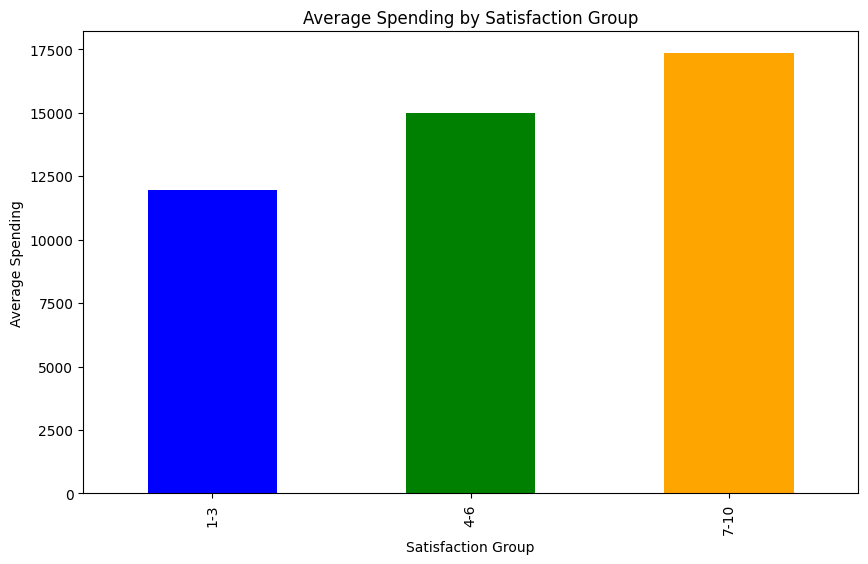

In [ ]:
import matplotlib.pyplot as plt

# Create satisfaction groups based on score ranges (e.g., 1-3, 4-6, 7-10)
bins = [0, 3, 6, 10]
labels = ['1-3', '4-6', '7-10']
final_merged_data['Satisfaction_Group'] = pd.cut(final_merged_data['mean_satisfaction_score'], bins=bins, labels=labels)

# Calculate the average spending for each satisfaction group
avg_spending = final_merged_data.groupby('Satisfaction_Group')['total_spent'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
avg_spending.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Average Spending by Satisfaction Group')
plt.xlabel('Satisfaction Group')
plt.ylabel('Average Spending')
plt.show()


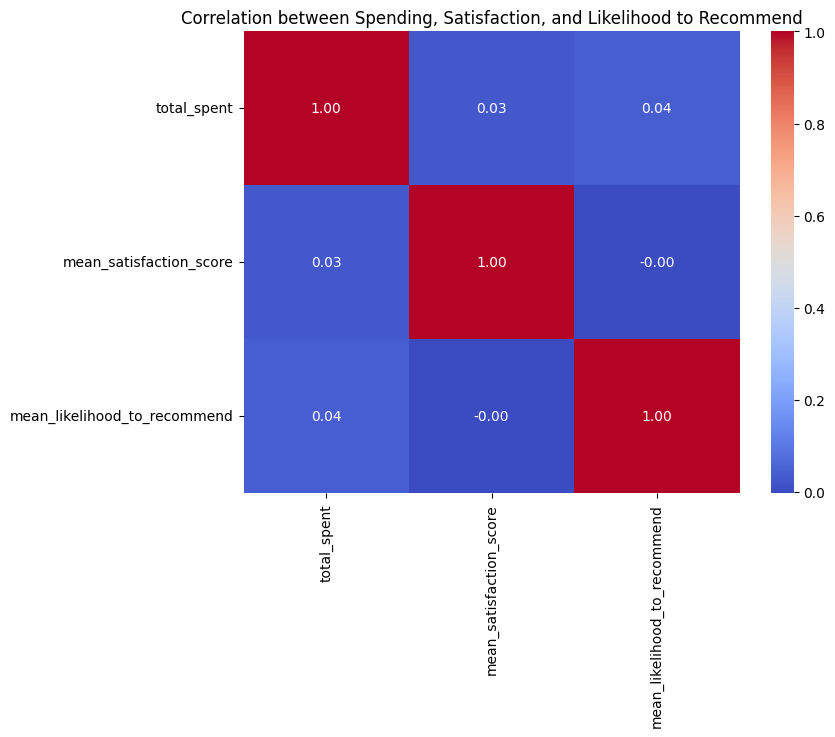

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = final_merged_data[['total_spent', 'mean_satisfaction_score', 'mean_likelihood_to_recommend']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation between Spending, Satisfaction, and Likelihood to Recommend')
plt.show()


<ipython-input-84-87ea5e9df81e>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




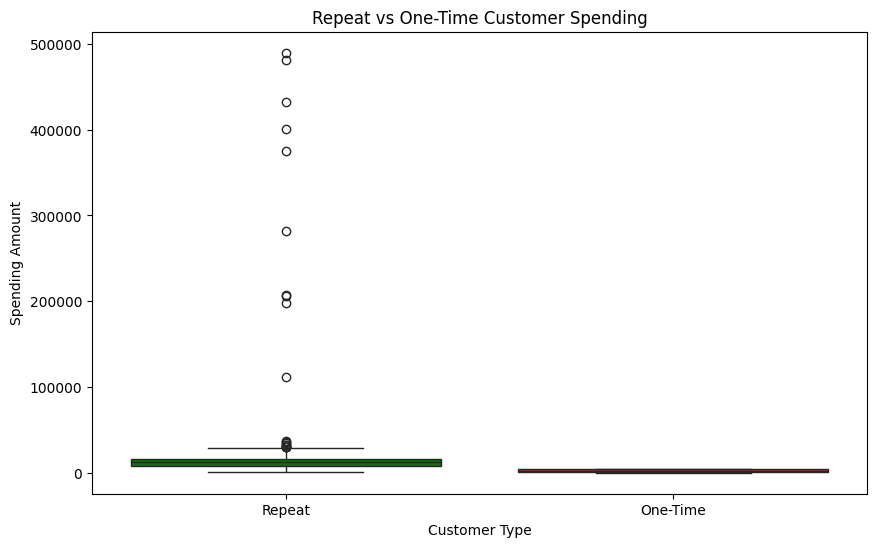

In [ ]:
# Identify repeat and one-time customers based on total_transactions
repeat_customers = final_merged_data[final_merged_data['total_transactions'] > 1]
one_time_customers = final_merged_data[final_merged_data['total_transactions'] == 1]

# Create a new column to differentiate repeat vs one-time customers
final_merged_data['Customer_Type'] = final_merged_data['Customer_ID'].apply(lambda x: 'Repeat' if x in repeat_customers['Customer_ID'].values else 'One-Time')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Type', y='total_spent', data=final_merged_data, palette=['green', 'red'])
plt.title('Repeat vs One-Time Customer Spending')
plt.xlabel('Customer Type')
plt.ylabel('Spending Amount')
plt.show()


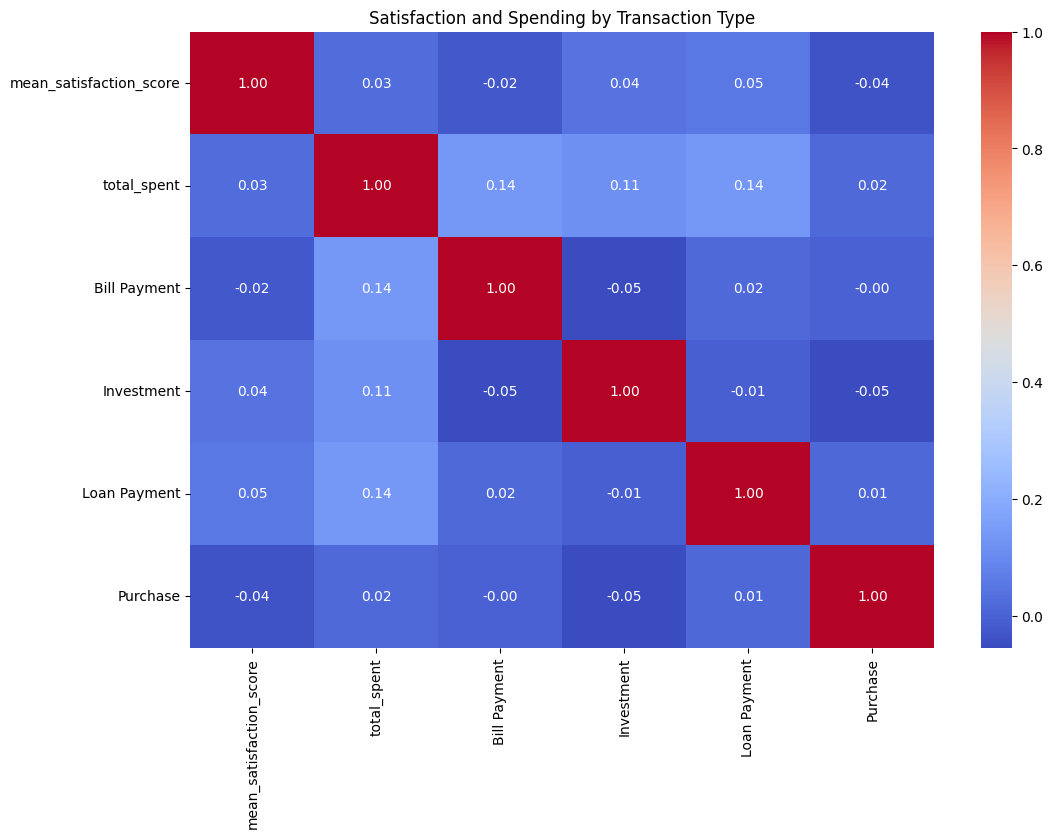

In [ ]:
# Convert the 'transaction_types_breakdown' column to individual columns for each transaction type
import ast  # For evaluating literal expressions like dictionaries

# Convert string representation to dictionaries
final_merged_data['transaction_types_breakdown'] = final_merged_data['transaction_types_breakdown'].apply(ast.literal_eval)

# Create individual columns for each transaction type and fill with values
for transaction_type in ['Bill Payment', 'Investment', 'Loan Payment', 'Purchase']:
    final_merged_data[transaction_type] = final_merged_data['transaction_types_breakdown'].apply(lambda x: x.get(transaction_type, 0))

# Calculate the mean satisfaction score and total spending for each transaction type
satisfaction_and_spending = final_merged_data.groupby('Customer_ID')[['mean_satisfaction_score', 'total_spent', 'Bill Payment', 'Investment', 'Loan Payment', 'Purchase']].mean().reset_index()


# Create the heatmap, excluding non-numerical columns
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
sns.heatmap(satisfaction_and_spending[['mean_satisfaction_score', 'total_spent', 'Bill Payment', 'Investment', 'Loan Payment', 'Purchase']].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Satisfaction and Spending by Transaction Type')
plt.show()